In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np

In [2]:
#dataset can be found in https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 
weather = pd.read_csv('weatherAUS.csv')

In [3]:
pd.set_option('max_columns', 100)

## Introduction <a name="introduction"></a>
Our goal is to be able to make prediction on whether it will rain on the next day. To do so, we will explore several models and work on the best one to compare their performance. 

In [4]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
#checking basic distributions of the fields  
weather.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,138415,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2013-10-30,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,NaN,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,NaN,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


In [6]:
#checking data type information
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
#transforming date into datetime variable
weather['Date'] = pd.to_datetime(weather['Date'])

In [171]:
#confirming datetime has been converted
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

### Drop RISK_MM variable
As noted in the dataset description, we need to drop the RISK_MM feature as it is the feature that is used to make binary category if "will it rain tomorrow". Thus, it should be removed at the beginning.

In [5]:
weather.drop(['RISK_MM'], axis = 1, inplace = True)

In [10]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Before starting our model predictions, we will split the train-cv-test data in 50/25/25 and then for our benchmark models, no substantive data analysis, feature selection or feature engineering will be applied. This split will prevent data leakage. 

Before splitting the data, we will make a few transformations to make our analysis easier later on.

In [6]:
#switching RainToday to Binary allows for analysis later on
weather['RainToday'] = weather['RainToday'].str.replace('Yes', "1")
weather['RainToday'] = weather['RainToday'].str.replace('No', "0")
weather['RainToday'] = weather['RainToday'].astype('float')

In [7]:
#switching RainTomorrow to Binary allows for analysis later on
weather['RainTomorrow'] = weather['RainTomorrow'].str.replace('Yes', "1")
weather['RainTomorrow'] = weather['RainTomorrow'].str.replace('No', "0")
weather['RainTomorrow'] = weather['RainTomorrow'].astype('float')

In [8]:
weather_target = weather['RainTomorrow']
weather_predictive = weather.drop(['RainTomorrow'], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

# We will first create a train/test split and then use K-fold cross-validation to tune the models 
# By separating test data. This will minimise the risk of data leakage
X_train, X_test, Y_train, Y_test = train_test_split(weather_predictive, 
                                                    weather_target, 
                                                    test_size=0.25, 
                                                    random_state = 5)
#random state to make sure consistent results and no data leakage in testing phase if rerun

In [15]:
#columns without null values
notnull_columns=X_train.columns[X_train.notnull().any()]
notnull_columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [16]:
#finding out percentage of null values in a field
null_columns=X_train.columns[X_train.isnull().any()]
X_train[null_columns].isnull().sum()/len(X_train)*100

MinTemp           0.441656
MaxTemp           0.228799
Rainfall          0.983647
Evaporation      42.928810
Sunshine         47.866734
WindGustDir       6.557331
WindGustSpeed     6.514197
WindDir9am        7.009302
WindDir3pm        2.625558
WindSpeed9am      0.943325
WindSpeed3pm      1.821012
Humidity9am       1.275271
Humidity3pm       2.535539
Pressure9am       9.899291
Pressure3pm       9.881475
Cloud9am         37.861483
Cloud3pm         40.289186
Temp9am           0.630134
Temp3pm           1.885713
RainToday         0.983647
dtype: float64

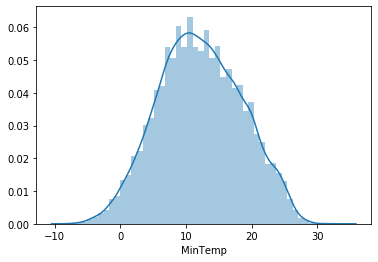

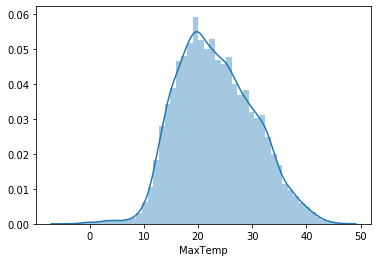

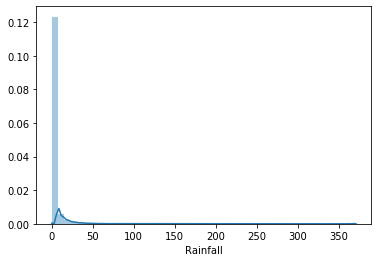

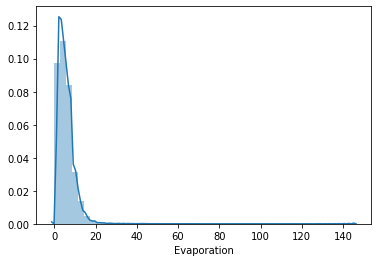

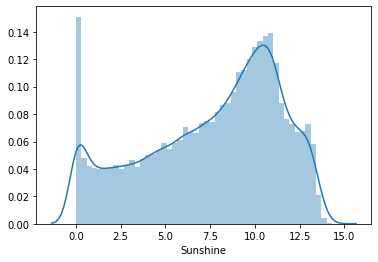

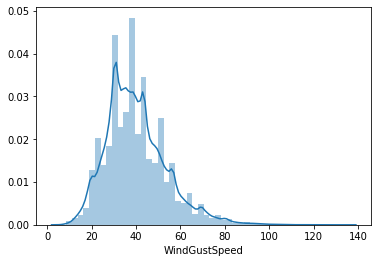

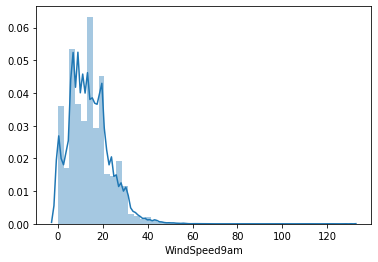

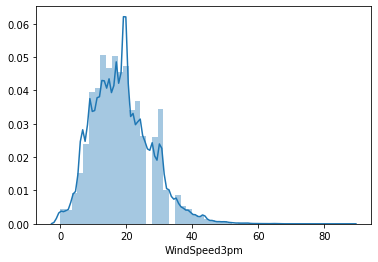

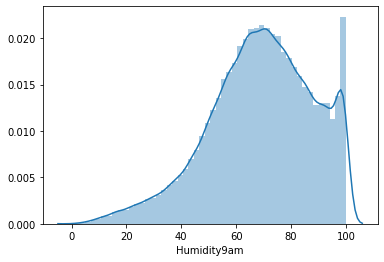

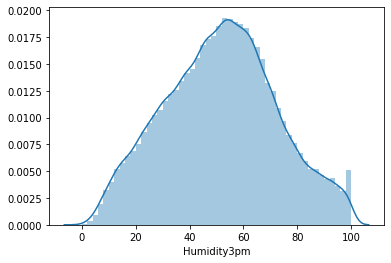

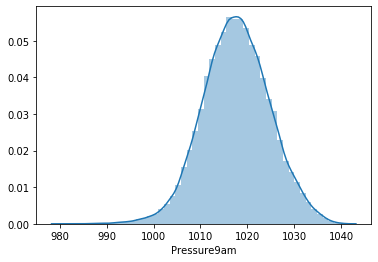

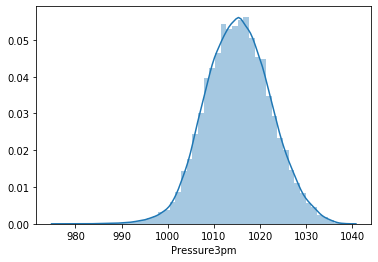

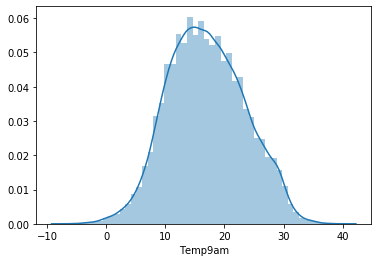

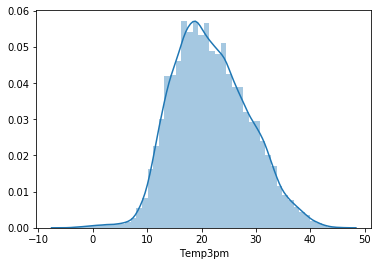

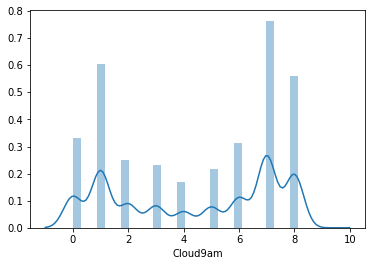

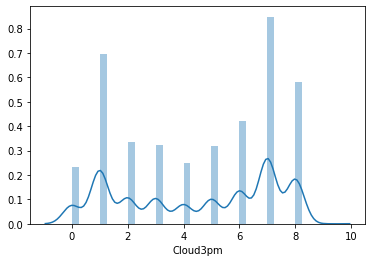

In [17]:
#checking distribution shape of numerical variables 
numerical_columns =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 
       'Temp3pm', 'Cloud9am', 'Cloud3pm']

categorical_columns = [
    'WindGustDir','WindDir9am','WindDir3pm',
    'Location'
    ]

for val in numerical_columns: 
    sns.distplot(X_train[val])
    plt.show()

## Date Variable

In [10]:
# Currently, it would be difficult for the model to pick up any pattern relating to date
# since every date is a different value. Therefore, it may be better if we take the year, month, and day
# component for training instead. 

for sets in [X_train, X_test]:
    sets['Year'] = sets['Date'].dt.year
    sets['Month'] = sets['Date'].dt.month
    sets['Day'] = sets['Date'].dt.day
    sets.drop('Date', axis = 1, inplace = True)

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

### Multicollinearity

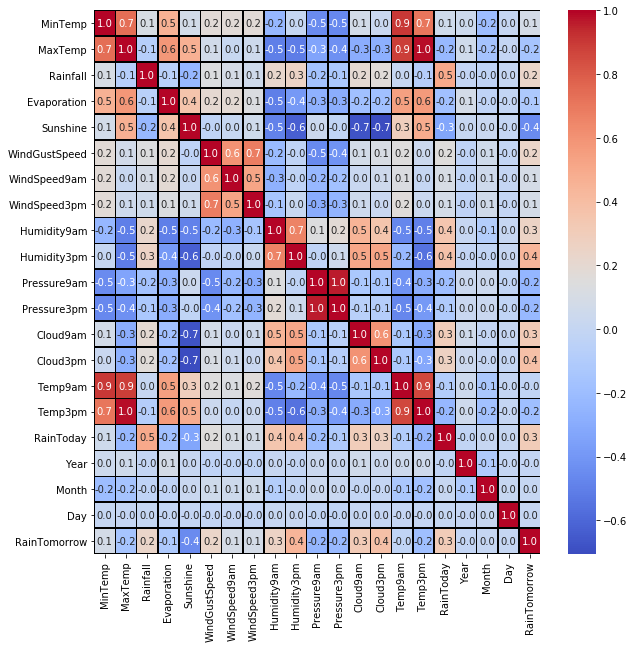

In [19]:
#presenting correlation of variables with high number of null values
lv, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.concat([X_train, Y_train], axis = 1).corr(), annot=True, linewidths=0.5, linecolor = 'black', fmt= '.1f',ax=ax, cmap="coolwarm")
plt.show()

There are three pairs (MaxTemp and Temp3pm, Temp9am and MinTemp, Pressure9am and Pressure3pm) that are highly correlated which will may be redundant. This will also be detremental to models such as logistic regression, where one of the key assumptions of the model is that there is an absence of multicollinearity. 

Therefore, we will verify the data visually to decide whether to drop those two variables. 

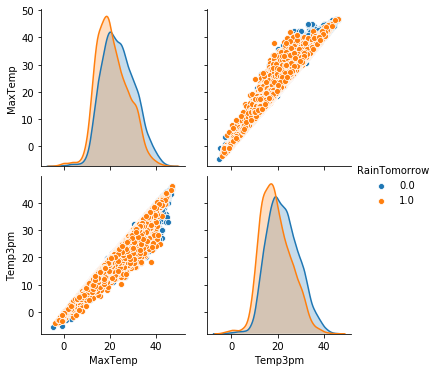

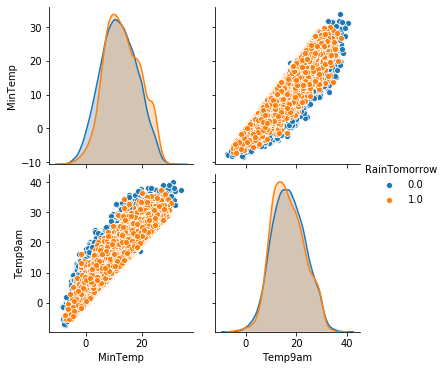

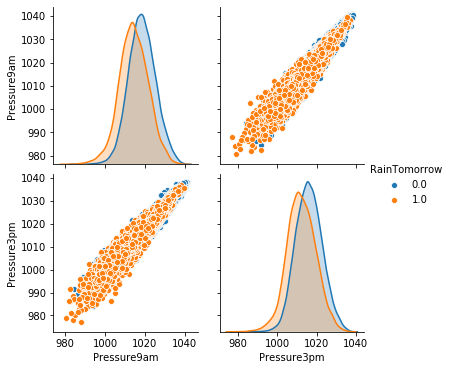

In [20]:
sns.pairplot( data=pd.concat([X_train, Y_train], axis = 1), vars=('MaxTemp', 'Temp3pm'), hue= 'RainTomorrow')

sns.pairplot( data=pd.concat([X_train, Y_train], axis = 1), vars=('MinTemp','Temp9am', ), hue= 'RainTomorrow')

sns.pairplot( data=pd.concat([X_train, Y_train], axis = 1), vars=('Pressure9am', 'Pressure3pm'), hue= 'RainTomorrow')

In [21]:
pd.concat([X_train, Y_train], axis = 1)[['MaxTemp','MinTemp','Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'RainTomorrow']].corr()

,MaxTemp,MinTemp,Temp9am,Temp3pm,Pressure9am,Pressure3pm,RainTomorrow
MaxTemp,1.000000,0.736289,0.887037,0.984566,-0.332539,-0.427094,-0.157755
MinTemp,0.736289,1.000000,0.901727,0.709092,-0.451120,-0.461448,0.084686
Temp9am,0.887037,0.901727,1.000000,0.860697,-0.423083,-0.470457,-0.025097
Temp3pm,0.984566,0.709092,0.860697,1.000000,-0.287548,-0.389781,-0.190434
Pressure9am,-0.332539,-0.451120,-0.423083,-0.287548,1.000000,0.961519,-0.244543
Pressure3pm,-0.427094,-0.461448,-0.470457,-0.389781,0.961519,1.000000,-0.224583
RainTomorrow,-0.157755,0.084686,-0.025097,-0.190434,-0.244543,-0.224583,1.000000


We can see that the values of MaxTemp and Temp3pm almost has a correlation of 1, while MinTemp and Temp9am has a correlation of 0.90. As such, Temp9am and MaxTemp will be removed, as the other two variables have a slightly stronger correlation with RainTomorrow. Same process is done for Pressure3pm

In [22]:
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Cloud9am',
 'Cloud3pm']

In [23]:
vif_copy = X_train[numerical_columns]

In [24]:
vif_copy['MinTemp'].fillna(vif_copy['MinTemp'].median(), inplace = True)

C:\Users\antho\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
vif_copy['MaxTemp'].fillna(vif_copy['MaxTemp'].median(), inplace = True)
vif_copy['Rainfall'].fillna(vif_copy['Rainfall'].median(), inplace = True)
vif_copy['Evaporation'].fillna(vif_copy['Evaporation'].median(), inplace = True)
vif_copy['Sunshine'].fillna(vif_copy['Sunshine'].median(), inplace = True)
vif_copy['WindGustSpeed'].fillna(vif_copy[ 'WindGustSpeed'].median(), inplace = True)
vif_copy['Humidity9am'].fillna(vif_copy['Humidity9am'].median(), inplace = True)
vif_copy['Humidity3pm'].fillna(vif_copy['Humidity3pm'].median(), inplace = True)
vif_copy['Pressure9am'].fillna(vif_copy['Pressure9am'].median(), inplace = True)
vif_copy['Temp9am'].fillna(vif_copy['Temp9am'].median(), inplace = True)
vif_copy['Temp9am'].fillna(vif_copy['Temp9am'].median(), inplace = True)
vif_copy['Temp3pm'].fillna(vif_copy['Temp3pm'].median(), inplace = True)
vif_copy['Cloud9am'].fillna(vif_copy['Cloud9am'].median(), inplace = True)
vif_copy['Cloud3pm'].fillna(vif_copy['Cloud3pm'].median(), inplace = True)

In [26]:
vif_copy['WindSpeed9am'].fillna(vif_copy['WindSpeed9am'].median(), inplace = True)
vif_copy['WindSpeed3pm'].fillna(vif_copy['WindSpeed3pm'].median(), inplace = True)
vif_copy['Pressure3pm'].fillna(vif_copy['Pressure3pm'].median(), inplace = True)

In [27]:
null_columns=vif_copy.columns[vif_copy.isnull().any()]
vif_copy[null_columns].isnull().sum()/len(vif_copy)*100

Series([], dtype: float64)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame() 


vif_data["feature"] = vif_copy.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif_copy.values, i) 
                          for i in range(len(vif_copy.columns))] 
  
print(vif_data)

          feature            VIF
0         MinTemp      39.123398
1         MaxTemp     262.042925
2        Rainfall       1.229529
3     Evaporation       4.892010
4        Sunshine      16.116999
5   WindGustSpeed      22.005331
6    WindSpeed9am       6.329366
7    WindSpeed3pm      10.819529
8     Humidity9am      50.707928
9     Humidity3pm      37.005963
10    Pressure9am  372718.075272
11    Pressure3pm  371138.657840
12        Temp9am     144.214980
13        Temp3pm     250.238421
14       Cloud9am       8.888028
15       Cloud3pm      10.372908


In [29]:
vif_copy2 = vif_copy[['MinTemp',
                     'Rainfall',
                     'Evaporation',
                     'Sunshine',
                     'WindGustSpeed',
                     'WindSpeed9am',
                     'WindSpeed3pm',
                     'Humidity9am',
                     'Humidity3pm',
                     'Pressure9am',
                     'Temp3pm',
                     'Cloud9am',
                     'Cloud3pm']] ###Drop MaxTemp, Temp9am, Pressure3pm 

In [30]:
vif_data2 = pd.DataFrame() 

vif_data2["feature"] = vif_copy2.columns 
  
# calculating VIF for each feature 
vif_data2["VIF"] = [variance_inflation_factor(vif_copy2.values, i) 
                          for i in range(len(vif_copy2.columns))] 
  
print(vif_data2)

          feature         VIF
0         MinTemp   20.566237
1        Rainfall    1.220094
2     Evaporation    4.864189
3        Sunshine   15.982428
4   WindGustSpeed   21.597272
5    WindSpeed9am    6.128291
6    WindSpeed3pm   10.544126
7     Humidity9am   33.129661
8     Humidity3pm   28.788099
9     Pressure9am  125.802237
10        Temp3pm   63.557564
11       Cloud9am    8.762349
12       Cloud3pm   10.219645


Since the VIF of Pressure9am is still unreasonably high, it will be removed.

In [31]:
vif_copy3 = vif_copy[['MinTemp',
                     'Rainfall',
                     'Evaporation',
                     'Sunshine',
                     'WindGustSpeed',
                     'WindSpeed9am',
                     'WindSpeed3pm',
                     'Humidity9am',
                     'Humidity3pm',
                     'Temp3pm',
                     'Cloud9am',
                     'Cloud3pm']] ###Drop Pressure9am

In [32]:
vif_data3 = pd.DataFrame() 

vif_data3["feature"] = vif_copy3.columns 
  
# calculating VIF for each feature 
vif_data3["VIF"] = [variance_inflation_factor(vif_copy3.values, i) 
                          for i in range(len(vif_copy3.columns))] 
  
print(vif_data3)

          feature        VIF
0         MinTemp  16.046365
1        Rainfall   1.199752
2     Evaporation   4.818655
3        Sunshine  13.519808
4   WindGustSpeed  20.417556
5    WindSpeed9am   5.871285
6    WindSpeed3pm  10.538833
7     Humidity9am  28.935877
8     Humidity3pm  23.373394
9         Temp3pm  37.041046
10       Cloud9am   8.573608
11       Cloud3pm   9.849099


##### PCA

One consideration is that we would use One Hot Encoding and then use PCA to alleviate the inflation of variables. 

In [33]:
# We will make a seperate set of X_train for the purpose of analysing PCA 
pca_X_train = X_train.copy()
pca_X_train.drop(['MaxTemp', 'Temp9am', 'Pressure3pm', 'Pressure9am'], axis=1, inplace = True)

In [34]:
from sklearn.decomposition import PCA 
pca = PCA()

dummy = pd.get_dummies(pca_X_train['Location'], sparse = False, prefix = 'Location', dummy_na = True)
pca_X_train = pd.concat([pca_X_train, dummy], axis = 1)
pca_X_train.drop(['Location'], axis = 1, inplace = True)

In [35]:
for cat in ['WindGustDir','WindDir9am','WindDir3pm']:   
        dummy = pd.get_dummies(pca_X_train[cat], sparse = False, prefix = cat, dummy_na = True)
        pca_X_train = pd.concat([pca_X_train, dummy], axis = 1)
        pca_X_train.drop([cat], axis = 1, inplace = True)

In [36]:
for cat in ['MinTemp',
             'Rainfall',
             'Evaporation',
             'Sunshine',
             'WindGustSpeed',
             'WindSpeed9am',
             'WindSpeed3pm',
             'Humidity9am',
             'Humidity3pm',
             'Temp3pm',
             'Cloud9am',
             'Cloud3pm']:
    pca_X_train[cat].fillna(pca_X_train[cat].median(),inplace = True)
        
pca_X_train['RainToday'].fillna(0.0,inplace = True)

null_columns=pca_X_train.columns[pca_X_train.isnull().any()]

[4.88320440e-01 1.91956064e-01 8.53103766e-02 5.56464092e-02
 5.11740965e-02 4.04907578e-02 2.96750684e-02 2.37000524e-02
 7.76027820e-03 6.76078537e-03 5.11716623e-03 4.48339815e-03
 3.24627542e-03 2.17560185e-03 1.43935341e-03 8.93188957e-05
 8.73400870e-05 7.66903294e-05 7.31912994e-05 6.73736578e-05
 6.70388397e-05 6.38514991e-05 5.97421244e-05 5.59003201e-05
 5.33413480e-05 5.08239720e-05 4.96183877e-05 4.85779849e-05
 4.71877332e-05 4.68726012e-05 4.55483578e-05 4.49511032e-05
 4.45862010e-05 4.39851197e-05 4.31542506e-05 4.20765034e-05
 4.20025490e-05 4.15400795e-05 4.10384788e-05 4.01016600e-05
 3.98726795e-05 3.95153900e-05 3.94613244e-05 3.83373283e-05
 3.80407958e-05 3.78140445e-05 3.72709779e-05 3.65424440e-05
 3.62205081e-05 3.60888394e-05 3.42762893e-05 3.35746097e-05
 3.32422320e-05 3.25500739e-05 3.19768865e-05 2.90888749e-05
 2.86885157e-05 2.77042746e-05 2.48894036e-05 2.22846996e-05
 2.14982030e-05 1.70000364e-05 1.62036748e-05 1.58538041e-05
 1.57151883e-05 1.553882

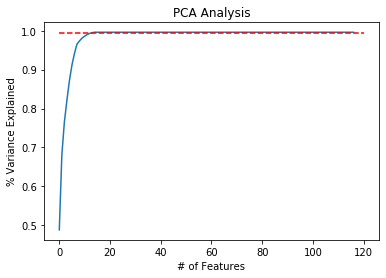

1.0

In [37]:
pca.fit_transform(pca_X_train)

#  X_train = pca.transform(X_train)
#Explained variance ratio
print(pca.explained_variance_ratio_)


var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.plot([0,120],[0.995, 0.995], 'r--')
plt.show()
#Cumulative variance
pca.explained_variance_ratio_.sum()

14 variables representing 99.5% of the variance. This is likely to remove all of the information held in one hot encoded variables and is thus inappropriate.

### Data Imbalance

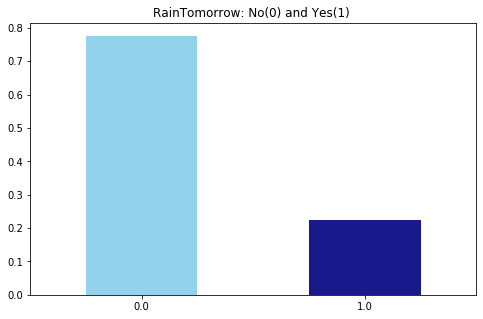

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Y_train.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow: No(0) and Yes(1) ')
plt.show()

We observe that there is imbalance of data. This will create a problem for the models to learn how to predict the minority class (since high accuracy can be achieved by having good predictions in the majority class or simply always predicting the majority class). We will upsample the size of 'Yes' in RainTommorow using SMOTE (Synthetic Minority Oversampling Technique). This will be done in the data transformation pipeline using imblearn which can automatically detect not to upsample CV/test data. 

Since the intention is to retain the valuable information of the 'Yes' class, upsampling will be done after most of the pre-processing step.

## Data Preprocessing

In [39]:
import statsmodels.api as sm

### Location Variable

There are no missing values in Location variable. We will encode the categorical values so that it is useable for training/testing. See discussion on Label Encoding vx  One Hot Encoding.

### MaxTemp / MinTemp Variables

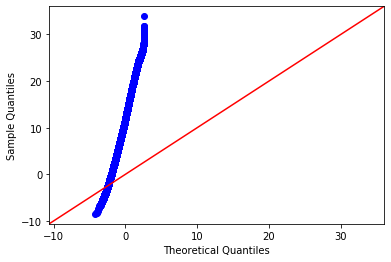

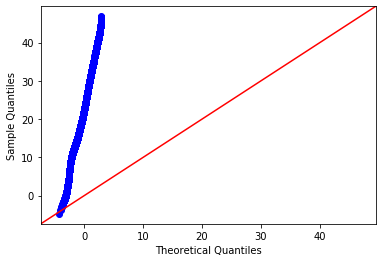

In [40]:
data = X_train['MinTemp']
fig = sm.qqplot(data, line = '45')
plt.show()
data = X_train['MaxTemp']
fig = sm.qqplot(data, line = '45')
plt.show()

MaxTemp and MinTemp have a a straight line going up which means they are too spread out for a normal distrbution. MaxTemp will be removed due to high VIF regardless.

### Rainfall Variable

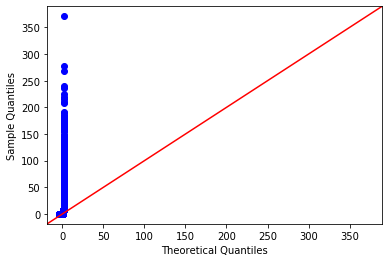

In [41]:
data = X_train['Rainfall']
fig = sm.qqplot(data, line = '45')
plt.show()

In [42]:
# as seen before, the rainfall variable is heavily skewed, 
# we will first find out the outliers using Tukey's Rule 

q1 = X_train['Rainfall'].quantile(0.25)
q3 = X_train['Rainfall'].quantile(0.75)
IQR = q3 - q1
IQR
lower = X_train['Rainfall'].median() - 1.5*IQR
upper = X_train['Rainfall'].median() + 1.5*IQR
print(lower); print(upper)

-1.2000000000000002
1.2000000000000002


Since we can see that outside the range provided by Turkey's Rule, the upper-limit only ends at 1.2 mm of rainfall. A lot of information would be lost if we simply discard values beyond this point. 

Thus, we will power-transform the data first instead. Then, we will impute the median values for missing data. Lastly, it will be scaled along with other numerical variables.

### Evaporation Variable

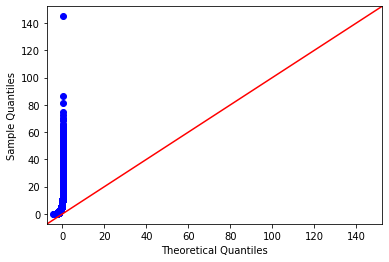

In [43]:
data = X_train['Evaporation']
fig = sm.qqplot(data, line = '45')
plt.show()

In [44]:
q1 = X_train['Evaporation'].quantile(0.25)
q3 = X_train['Evaporation'].quantile(0.75)
IQR = q3 - q1
IQR
lower = X_train['Evaporation'].median() - 1.5*IQR
upper = X_train['Evaporation'].median() + 1.5*IQR
print(lower); print(upper)

-2.6000000000000014
11.8


We will apply the same treatment to evaporation as well for the same reasons. 

### Sunshine Variable 

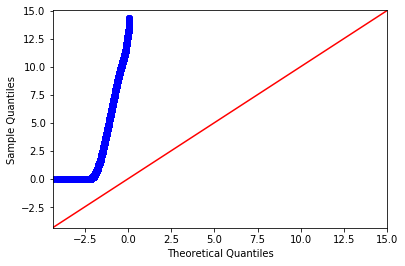

In [45]:
data = X_train['Sunshine']
fig = sm.qqplot(data, line = '45')
plt.show()

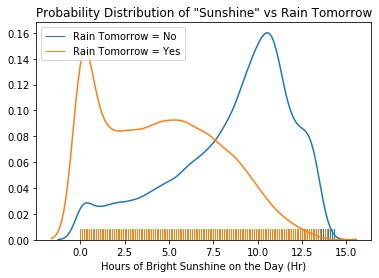

In [46]:
#Sunshine 
msk2 = Y_train == 0
msk3 = Y_train == 1
msk1 = X_train["Sunshine"].notnull()
target0 = X_train[msk1 & msk2]
target1 = X_train[msk1 & msk3]
sns.distplot(target0["Sunshine"], hist=False, rug=True)
sns.distplot(target1["Sunshine"], hist=False, rug=True)
plt.legend(labels=['Rain Tomorrow = No','Rain Tomorrow = Yes'])
plt.xlabel('Hours of Bright Sunshine on the Day (Hr)')
plt.title('Probability Distribution of "Sunshine" vs Rain Tomorrow')
plt.show()

A somewhat bimodal distribution. We will impute median values and feature scale it.

# Numerical Variables 

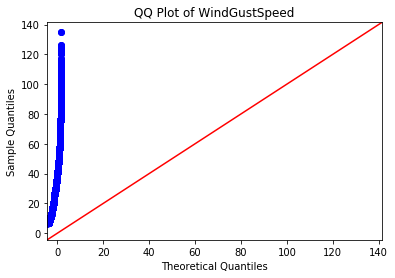

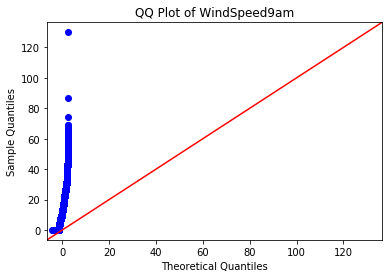

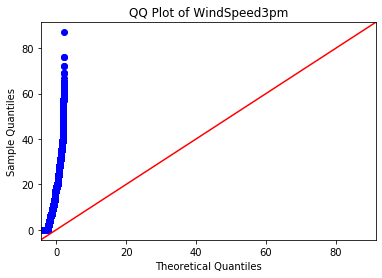

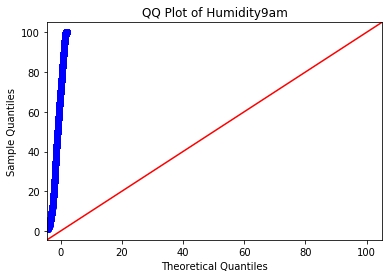

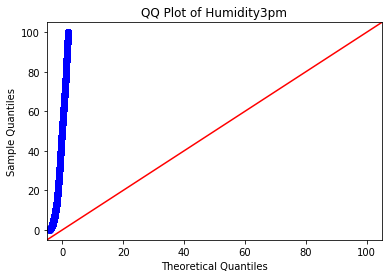

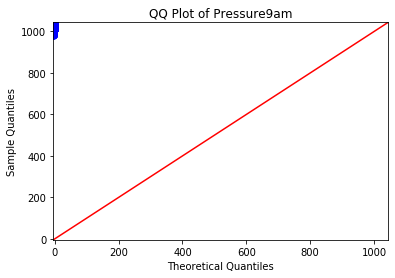

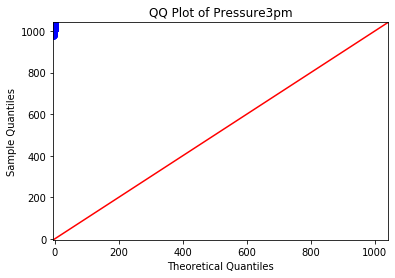

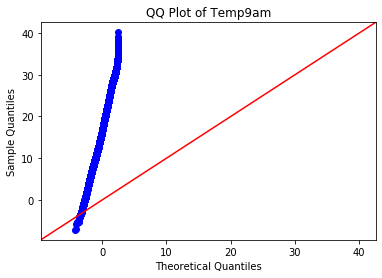

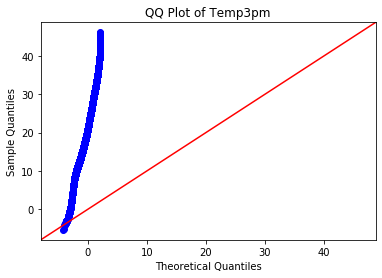

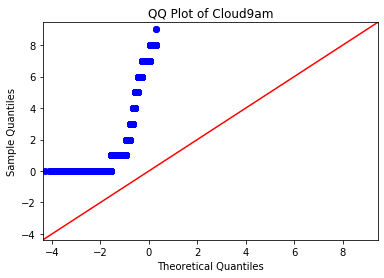

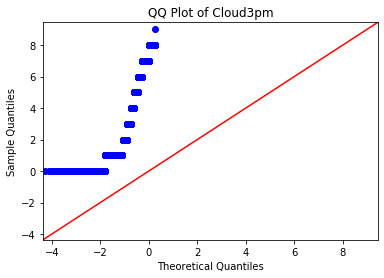

In [47]:
for val in numerical_columns: 
    if val not in ['Sunshine', 'Evaporation', 'Rainfall', 'MinTemp', 'MaxTemp']:
        fig = sm.qqplot(X_train[val], line = '45')
        plt.title(f'QQ Plot of {val}')
        plt.show()

It is shown that most numerical values have a distribution that is more spread out than a normal distribution. This was not obvious in the distribution plots because the distribution of variables on the y-axis has been scaled. 

# Categorical Variables 

In [48]:
null_columns=X_train.columns[X_train.isnull().any()]
X_train[null_columns].isnull().sum()/len(weather)*100

MinTemp           0.331240
MaxTemp           0.171598
Rainfall          0.737730
Evaporation      32.196381
Sunshine         35.899798
WindGustDir       4.917964
WindGustSpeed     4.885613
WindDir9am        5.256940
WindDir3pm        1.969155
WindSpeed9am      0.707489
WindSpeed3pm      1.365749
Humidity9am       0.956447
Humidity3pm       1.901641
Pressure9am       7.424416
Pressure3pm       7.411054
Cloud9am         28.395913
Cloud3pm         30.216677
Temp9am           0.472597
Temp3pm           1.414275
RainToday         0.737730
dtype: float64

### Encoding for categorical variables

In [49]:
for column in categorical_columns:
    print(str(column))
    print(weather[column].nunique())

WindGustDir
16
WindDir9am
16
WindDir3pm
16
Location
49


As we can see, Location has numerous unique values and also the other categocial variables. In deciding whether to use OneHotEncoding vs LabelEncoding/OrdinalEncoding.

The downside of LabelEncoding is that it converts categories into inherently ordinal data where no relationship necessarily exists. In this case, even with even with closer relationship in Location (by distance) and wind direction (by angle proximity), this can be hardly reflected. I expect that this will be detrimental to non-tree based models such as logistic regression and neural network.

The downside of OneHotEncoding is that the machine learning will become computationally heavy. Since the expansion of variables are based on numerous categories in 4 variables, PCA may not be a viable since those would like be discharged unfairly.

With the constraints of computational power, time and understood methods, LabelEncoding will be used.

## Feature Scaling 

Since we will employ logistic regression and also neural network model, these non-tree based models can really benefit from scaling the data. As shown above, standard scaling to shift data to have a more standard distribution. 

## Model Training and Selection

In [15]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [16]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

C:\Users\antho\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#utilising tensorflow GPU for faster training speed over sklearn NN

In [18]:
import warnings

In [19]:
warnings.filterwarnings('ignore')

nonnorm_num_columns = ['Rainfall', 'Evaporation']

norm_num_columns =['MinTemp',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 
        'Humidity9am', 'Humidity3pm', 
        'Temp3pm', 'Cloud9am', 'Cloud3pm'
       ]  #dropping Temp9am and MaxTemp, Pressure9am and Pressure3pm

categorical_columns = [
    'WindGustDir','WindDir9am','WindDir3pm',
    'Location'
    ]

norm_num_process = Pipeline([
    ('num_imp', SimpleImputer(strategy = 'median', add_indicator = False)),
    ('stand_scale', StandardScaler())
])

nonnorm_num_process = Pipeline([
    ('num_imp', SimpleImputer(strategy = 'median', add_indicator = False)),
    ('log_trans', PowerTransformer()),
    ('stand_scale', StandardScaler())
])

wind_process = Pipeline([
    ('wind_imp', SimpleImputer(strategy='constant',   fill_value = 'NAN', add_indicator = False)),
    ('dummy1', OrdinalEncoder())
])

Location_process = Pipeline([
    ('dummy2', OrdinalEncoder())
])

raintoday_process = Pipeline([
    ('raintoday', SimpleImputer(strategy='most_frequent', add_indicator = False))
])

preprocessor = ColumnTransformer([
    ('pp_norm', norm_num_process, norm_num_columns),
    ('pp_nonnorm', nonnorm_num_process, nonnorm_num_columns),
    ('wind', wind_process, ['WindGustDir','WindDir9am','WindDir3pm']),
    ('loc', Location_process, ['Location']),
    ('rt', raintoday_process, ['RainToday'])],
    remainder = 'drop') #dropping Temp9am and MaxTemp, Pressure9am and Pressure3pm

#### Logistic Regression Classifier

In [54]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [55]:
param_grid = [
    {'C': [0.01, 1, 100, 1000, 1e5], 
     'tol': [0.01, 1, 100, 1000, 1e5], 
    'penalty': ['l1', 'l2']}
]

reg = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 20000, verbose =2), 
                   param_grid, cv = 10, return_train_score = True, scoring = 'f1')

LogReg = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('classifier', reg)])

gridLogReg = LogReg.fit(X_train,Y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

In [16]:
from joblib import dump, load

In [57]:
dump(LogReg, 'Project2_LogReg.joblib')

['Project2_LogReg.joblib']

In [17]:
LogReg = load('Project2_LogReg.joblib') 

In [59]:
print('Grid search mean and stdev:\n')
scoring = LogReg[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.771 (+/-0.009) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
0.761 (+/-0.018) for {'C': 0.01, 'penalty': 'l1', 'tol': 1}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l1', 'tol': 100}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l1', 'tol': 1000}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l1', 'tol': 100000.0}
0.771 (+/-0.010) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.768 (+/-0.009) for {'C': 0.01, 'penalty': 'l2', 'tol': 1}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l2', 'tol': 100}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l2', 'tol': 1000}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l2', 'tol': 100000.0}
0.772 (+/-0.010) for {'C': 1, 'penalty': 'l1', 'tol': 0.01}
0.759 (+/-0.026) for {'C': 1, 'penalty': 'l1', 'tol': 1}
0.000 (+/-0.000) for {'C': 1, 'penalty': 'l1', 'tol': 100}
0.000 (+/-0.000) for {'C': 1, 'penalty': 'l1', 'tol': 1000}
0.000 (+/-0.000) for {'C': 1, 'penalty': 'l1', 'tol': 100000.0}
0.771 (+/-0.010) for {'C': 1, 'penalty': 

In [60]:
print('\nBest parameters:', LogReg[2].best_params_)


Best parameters: {'C': 1, 'penalty': 'l1', 'tol': 0.01}


In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, LogReg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     27572
         1.0       0.50      0.76      0.61      7977

    accuracy                           0.78     35549
   macro avg       0.71      0.77      0.73     35549
weighted avg       0.83      0.78      0.79     35549



In [20]:
import numbers

def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    
    if len(param_cols) ==1:
        param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    else:
        param_ranges = [grid.param_grid[0][p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
    train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()

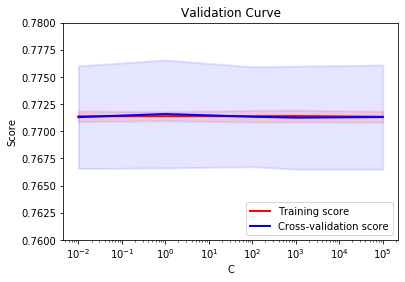

In [202]:
plot_grid_search_validation_curve(LogReg[2], 'C', log=True, ylim=(0.76, 0.78))

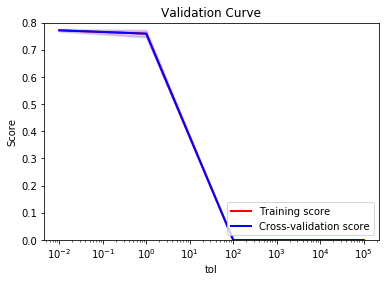

In [64]:
plot_grid_search_validation_curve(LogReg[2], 'tol', log=True, ylim=(0, 0.8))

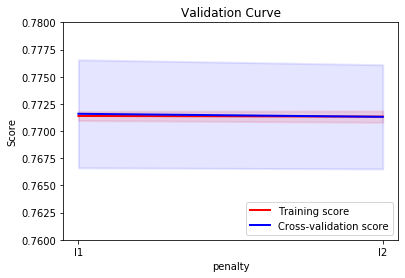

In [204]:
plot_grid_search_validation_curve(LogReg[2], 'penalty', log=False, ylim=(0.76, 0.78))

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [19]:
def plot_learning_curve(pipeline_learning):
    train_sizes, train_scores, valid_scores = learning_curve(pipeline_learning, 
                                                         X_train, 
                                                         Y_train, 
                                                         train_sizes=[14000,
                                                                    28000,
                                                                    42000,
                                                                    56000,
                                                                    70000
                                                                    ], 
                                                         cv=10, n_jobs = 4)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.title('Learning-Curve')
    plt.ylabel('Score')
    plt.xlabel('Number of Training Samples')
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\antho\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

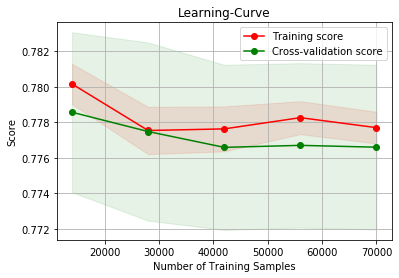

In [231]:
LogReg_learning = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('classifier', LogisticRegression(solver = 'liblinear',
                                      max_iter = 20000, 
                                      verbose =1,
                                      C= 1, 
                                      penalty= 'l1', 
                                      tol= 0.01))]) #best parameters

plot_learning_curve(LogReg_learning)

#### Decision Tree Classifier

In [130]:
tree_param_grid = [
    {'max_depth': [2,4,8,16,24,30,36],
     'criterion': ['entropy', 'gini'],
     'splitter': ['best', 'random']}
]

Dtree_classifer = GridSearchCV(DecisionTreeClassifier(), 
                               tree_param_grid, 
                               cv = 10, 
                               return_train_score = True,
                               scoring = 'f1')
Dtree = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    (('sampling', SMOTE())),
    ('tree_classifer', Dtree_classifer)
])

tuned_Dtree = Dtree.fit(X_train, Y_train)

In [131]:
dump(Dtree, 'Project2_Dtree.joblib')

['Project2_Dtree.joblib']

In [20]:
Dtree = load('Project2_Dtree.joblib')

In [222]:
print('Grid search mean and stdev:\n')
scoring = Dtree[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.728 (+/-0.056) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
0.700 (+/-0.102) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
0.751 (+/-0.036) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
0.718 (+/-0.043) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
0.790 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}
0.758 (+/-0.045) for {'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}
0.823 (+/-0.158) for {'criterion': 'entropy', 'max_depth': 16, 'splitter': 'best'}
0.794 (+/-0.090) for {'criterion': 'entropy', 'max_depth': 16, 'splitter': 'random'}
0.826 (+/-0.191) for {'criterion': 'entropy', 'max_depth': 24, 'splitter': 'best'}
0.815 (+/-0.106) for {'criterion': 'entropy', 'max_depth': 24, 'splitter': 'random'}
0.826 (+/-0.193) for {'criterion': 'entropy', 'max_depth': 30, 'splitter': 'best'}
0.823 (+/-0.104) for {'criterion': 'entropy', 'max_dep

In [221]:
# Print best params
print('\nBest parameters:', Dtree[2].best_params_)


Best parameters: {'criterion': 'gini', 'max_depth': 24, 'splitter': 'best'}


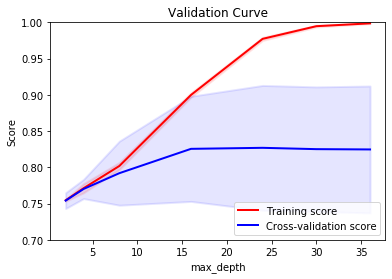

In [134]:
plot_grid_search_validation_curve(Dtree[2], 'max_depth', log=False, ylim=(0.7, 1))

<module 'matplotlib.pyplot' from 'C:\\Users\\antho\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

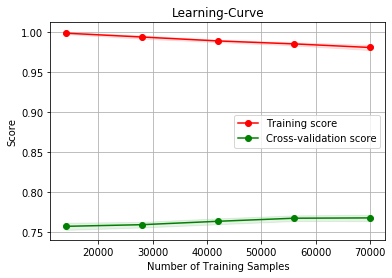

In [232]:
Dtree_learning = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('tree_classifer', DecisionTreeClassifier(criterion= 'gini', 
                                                max_depth= 24, 
                                                splitter = 'best'))
    ]) #best parameters

plot_learning_curve(Dtree_learning)

#### Random Forest Classifier

In [71]:
forest_param_grid = [
    {'n_estimators': [16,64],
     'max_depth' : [2,4,8,16,24,30,36],
     'criterion': ['entropy', 'gini']}
]

Rforest_classifer = GridSearchCV(RandomForestClassifier(), 
                                 forest_param_grid, 
                                 cv = 10, 
                                 return_train_score = True, 
                                 scoring = 'f1')
Rforest = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('tree_classifer', Rforest_classifer)
])

tuned_Rforest = Rforest.fit(X_train, Y_train)

In [72]:
dump(Rforest, 'Project2_Rforest.joblib')

['Project2_Rforest.joblib']

In [21]:
Rforest = load('Project2_Rforest.joblib')

In [74]:
print('Grid search mean and stdev:\n')
scoring = Rforest[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.751 (+/-0.046) for {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 16}
0.756 (+/-0.036) for {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 64}
0.779 (+/-0.053) for {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 16}
0.780 (+/-0.052) for {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 64}
0.815 (+/-0.087) for {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 16}
0.817 (+/-0.088) for {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 64}
0.865 (+/-0.140) for {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 16}
0.868 (+/-0.144) for {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 64}
0.884 (+/-0.154) for {'criterion': 'entropy', 'max_depth': 24, 'n_estimators': 16}
0.892 (+/-0.153) for {'criterion': 'entropy', 'max_depth': 24, 'n_estimators': 64}
0.885 (+/-0.166) for {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 16}
0.894 (+/-0.156) for {'criterion': 'entropy', 'max_depth': 30, '

In [75]:
# Print best params
print('\nBest parameters:', Rforest[2].best_params_)


Best parameters: {'criterion': 'entropy', 'max_depth': 36, 'n_estimators': 64}


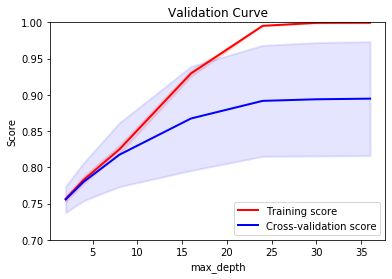

In [77]:
plot_grid_search_validation_curve(Rforest[2], 'max_depth', log=False, ylim=(0.7, 1))

<module 'matplotlib.pyplot' from 'C:\\Users\\antho\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

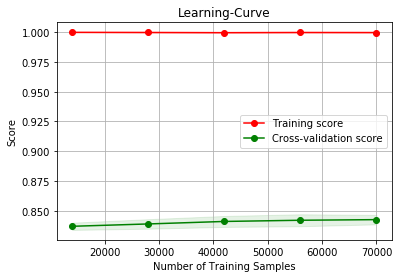

In [233]:
Rforest_learning = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('classifer', RandomForestClassifier(criterion= 'entropy', 
                                              max_depth= 36, 
                                              n_estimators= 64))
    ]) #best parameters

plot_learning_curve(Rforest_learning)

#### Neural Network

In [22]:
dropout = [ 0.1, 0.2, 0.3, 0.4]
units = [1024, 2048]

def create_model(units = 16, dropout = 0.1):
    model = Sequential()
    model.add(Dense(units=units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=units/2, activation='relu'))
    model.add(Dropout(dropout/2))
    model.add(Dense(units=units/2, activation='relu'))
    model.add(Dropout(dropout/2))
    model.add(Dense(units=units/4, activation='relu'))
    model.add(Dropout(dropout/4))
    model.add(Dense(units=units/8, activation='relu'))
    model.add(Dropout(dropout/8))
    model.add(Dense(units=1, activation = 'sigmoid')) 
    model.compile(optimizer = 'adam', 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    return model 


In [23]:
NNclassifier = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 2048)

NN_param_grid = dict(dropout = dropout, units= units, )
NNclassifier = GridSearchCV(NNclassifier, 
                    param_grid=NN_param_grid, 
                    cv=10, 
                    return_train_score= True,
                    scoring = 'f1')

NN = Pipeline(steps = [ 
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('NN_classifier', NNclassifier)
])

tuned_NN = NN.fit(X_train, Y_train)

Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 10us/sample - loss: 0.5475 - accuracy: 0.7200
Epoch 2/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.4595 - accuracy: 0.7806
Epoch 3/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4481 - accuracy: 0.7873
Epoch 4/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4417 - accuracy: 0.7918
Epoch 5/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4347 - accuracy: 0.7966
Epoch 6/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4298 - accuracy: 0.7997
Epoch 7/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.4265 - accuracy: 0.8016
Epoch 8/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4229 - accuracy: 0.8035
Epoch 9/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4197 - accuracy: 0

148939/148939 [==============================] - 0s 3us/sample - loss: 0.1866 - accuracy: 0.9251
Epoch 50/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1830 - accuracy: 0.9266
Epoch 51/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1784 - accuracy: 0.9277
Epoch 52/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1738 - accuracy: 0.9303
Epoch 53/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.1709 - accuracy: 0.9309
Epoch 54/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1664 - accuracy: 0.9344
Epoch 55/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1624 - accuracy: 0.9359
Epoch 56/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1596 - accuracy: 0.9361
Epoch 57/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1549 - accuracy: 0.9388
Epoch 58/100
148939/148

148939/148939 [==============================] - 0s 3us/sample - loss: 0.0783 - accuracy: 0.9705
Epoch 98/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.0777 - accuracy: 0.9708
Epoch 99/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.0770 - accuracy: 0.9708
Epoch 100/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.0757 - accuracy: 0.9716
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.5447 - accuracy: 0.7187
Epoch 2/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4592 - accuracy: 0.7806
Epoch 3/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.4488 - accuracy: 0.7869
Epoch 4/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4419 - accuracy: 0.7913
Epoch 5/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4368 - accuracy: 0.7938
Epo

148939/148939 [==============================] - 0s 2us/sample - loss: 0.1907 - accuracy: 0.9227
Epoch 46/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1855 - accuracy: 0.9255
Epoch 47/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1796 - accuracy: 0.9282
Epoch 48/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1750 - accuracy: 0.9299
Epoch 49/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1715 - accuracy: 0.9318
Epoch 50/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1683 - accuracy: 0.9329
Epoch 51/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.1638 - accuracy: 0.9350
Epoch 52/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.1607 - accuracy: 0.9366
Epoch 53/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1540 - accuracy: 0.9389
Epoch 54/100
148939/148

148939/148939 [==============================] - 0s 2us/sample - loss: 0.0827 - accuracy: 0.9683
Epoch 94/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.0822 - accuracy: 0.9690
Epoch 95/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.0808 - accuracy: 0.9692
Epoch 96/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.0799 - accuracy: 0.9702
Epoch 97/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.0770 - accuracy: 0.9708
Epoch 98/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.0793 - accuracy: 0.9700
Epoch 99/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.0774 - accuracy: 0.9706
Epoch 100/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.0753 - accuracy: 0.9716
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.5512 - accuracy: 0.7141

148939/148939 [==============================] - 0s 3us/sample - loss: 0.2465 - accuracy: 0.8956
Epoch 42/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2391 - accuracy: 0.8993
Epoch 43/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2331 - accuracy: 0.9014
Epoch 44/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2299 - accuracy: 0.9028
Epoch 45/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2257 - accuracy: 0.9053
Epoch 46/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2184 - accuracy: 0.9084
Epoch 47/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2161 - accuracy: 0.9092
Epoch 48/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2081 - accuracy: 0.9139
Epoch 49/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2042 - accuracy: 0.9146
Epoch 50/100
148939/148

148940/148940 [==============================] - ETA: 0s - loss: 0.1068 - accuracy: 0.95 - 0s 2us/sample - loss: 0.1071 - accuracy: 0.9578
Epoch 90/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1047 - accuracy: 0.9595
Epoch 91/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1050 - accuracy: 0.9595
Epoch 92/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1051 - accuracy: 0.9591
Epoch 93/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1030 - accuracy: 0.9601
Epoch 94/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.0991 - accuracy: 0.9615
Epoch 95/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.0996 - accuracy: 0.9610
Epoch 96/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.0975 - accuracy: 0.9625
Epoch 97/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.0964 

148940/148940 [==============================] - 0s 2us/sample - loss: 0.1491 - accuracy: 0.9400
Epoch 64/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1469 - accuracy: 0.9407
Epoch 65/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1426 - accuracy: 0.9438
Epoch 66/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1414 - accuracy: 0.9436
Epoch 67/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1382 - accuracy: 0.9449
Epoch 68/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1334 - accuracy: 0.9472
Epoch 69/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1335 - accuracy: 0.9467
Epoch 70/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1310 - accuracy: 0.9477
Epoch 71/100
148940/148940 [==============================] - 0s 2us/sample - loss: 0.1266 - accuracy: 0.9499
Epoch 72/100
148940/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.4047 - accuracy: 0.8128
Epoch 12/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3994 - accuracy: 0.8159
Epoch 13/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3938 - accuracy: 0.8200
Epoch 14/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3883 - accuracy: 0.8226
Epoch 15/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3822 - accuracy: 0.8271
Epoch 16/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3770 - accuracy: 0.8296
Epoch 17/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3707 - accuracy: 0.8321
Epoch 18/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3647 - accuracy: 0.8357
Epoch 19/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3574 - accuracy: 0.8396
Epoch 20/100
148939/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.1061 - accuracy: 0.9595
Epoch 60/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1044 - accuracy: 0.9593
Epoch 61/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1007 - accuracy: 0.9619
Epoch 62/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1001 - accuracy: 0.9622
Epoch 63/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.0959 - accuracy: 0.9637
Epoch 64/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.0917 - accuracy: 0.9647
Epoch 65/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.0907 - accuracy: 0.9661
Epoch 66/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.0894 - accuracy: 0.9661
Epoch 67/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.0860 - accuracy: 0.9675
Epoch 68/100
148939/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.4242 - accuracy: 0.8015
Epoch 8/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4195 - accuracy: 0.8055
Epoch 9/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4156 - accuracy: 0.8069
Epoch 10/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4108 - accuracy: 0.8096
Epoch 11/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4071 - accuracy: 0.8115
Epoch 12/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4017 - accuracy: 0.8152
Epoch 13/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3985 - accuracy: 0.8167
Epoch 14/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3951 - accuracy: 0.8189
Epoch 15/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3884 - accuracy: 0.8234
Epoch 16/100
148939/14893

148939/148939 [==============================] - 1s 6us/sample - loss: 0.1231 - accuracy: 0.9516
Epoch 56/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1200 - accuracy: 0.9537
Epoch 57/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1182 - accuracy: 0.9544
Epoch 58/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1136 - accuracy: 0.9565
Epoch 59/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1099 - accuracy: 0.9573
Epoch 60/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1061 - accuracy: 0.9591
Epoch 61/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1023 - accuracy: 0.9610
Epoch 62/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1008 - accuracy: 0.9620
Epoch 63/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.0971 - accuracy: 0.9627
Epoch 64/100
148939/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.4437 - accuracy: 0.7897
Epoch 4/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4387 - accuracy: 0.7927
Epoch 5/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4318 - accuracy: 0.7969
Epoch 6/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4272 - accuracy: 0.7993
Epoch 7/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4260 - accuracy: 0.8007
Epoch 8/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4209 - accuracy: 0.8035
Epoch 9/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4173 - accuracy: 0.8049
Epoch 10/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4149 - accuracy: 0.8074
Epoch 11/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4095 - accuracy: 0.8097
Epoch 12/100
148939/148939 [=

148940/148940 [==============================] - 1s 6us/sample - loss: 0.1408 - accuracy: 0.9438
Epoch 52/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1365 - accuracy: 0.9457
Epoch 53/100
148940/148940 [==============================] - 1s 7us/sample - loss: 0.1341 - accuracy: 0.9464
Epoch 54/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1282 - accuracy: 0.9488
Epoch 55/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1239 - accuracy: 0.9512
Epoch 56/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1220 - accuracy: 0.9518
Epoch 57/100
148940/148940 [==============================] - 1s 7us/sample - loss: 0.1144 - accuracy: 0.9548
Epoch 58/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1117 - accuracy: 0.9565
Epoch 59/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1094 - accuracy: 0.9573
Epoch 60/100
148940/148

148940/148940 [==============================] - 1s 6us/sample - loss: 0.0525 - accuracy: 0.9807
Epoch 100/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.0519 - accuracy: 0.9807
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 8us/sample - loss: 0.5563 - accuracy: 0.7138
Epoch 2/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4635 - accuracy: 0.7791
Epoch 3/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4518 - accuracy: 0.7859
Epoch 4/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4463 - accuracy: 0.7904
Epoch 5/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4409 - accuracy: 0.7929
Epoch 6/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4352 - accuracy: 0.7970
Epoch 7/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4330 - accuracy: 0.7984
Epoch

148939/148939 [==============================] - 0s 3us/sample - loss: 0.2457 - accuracy: 0.8975
Epoch 48/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2425 - accuracy: 0.8997
Epoch 49/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2387 - accuracy: 0.9002
Epoch 50/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2349 - accuracy: 0.9027
Epoch 51/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2304 - accuracy: 0.9047
Epoch 52/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2257 - accuracy: 0.9071
Epoch 53/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2254 - accuracy: 0.9069
Epoch 54/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2214 - accuracy: 0.9080
Epoch 55/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2182 - accuracy: 0.9104
Epoch 56/100
148939/148

148939/148939 [==============================] - 0s 3us/sample - loss: 0.1418 - accuracy: 0.9443
Epoch 96/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1406 - accuracy: 0.9447
Epoch 97/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1391 - accuracy: 0.9454
Epoch 98/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1384 - accuracy: 0.9453
Epoch 99/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1374 - accuracy: 0.9463
Epoch 100/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1356 - accuracy: 0.9470
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.5402 - accuracy: 0.7253
Epoch 2/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4635 - accuracy: 0.7775
Epoch 3/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4525 - accuracy: 0.7848
E

148939/148939 [==============================] - 0s 3us/sample - loss: 0.2717 - accuracy: 0.8850
Epoch 44/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2670 - accuracy: 0.8871
Epoch 45/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2621 - accuracy: 0.8899
Epoch 46/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2572 - accuracy: 0.8923
Epoch 47/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2538 - accuracy: 0.8941
Epoch 48/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2507 - accuracy: 0.8956
Epoch 49/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2466 - accuracy: 0.8972
Epoch 50/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2442 - accuracy: 0.8981
Epoch 51/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2365 - accuracy: 0.9022
Epoch 52/100
148939/148

148939/148939 [==============================] - 0s 3us/sample - loss: 0.1459 - accuracy: 0.9419
Epoch 92/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.1456 - accuracy: 0.9427
Epoch 93/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1445 - accuracy: 0.9428
Epoch 94/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1414 - accuracy: 0.9440
Epoch 95/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1408 - accuracy: 0.9438
Epoch 96/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1401 - accuracy: 0.9451
Epoch 97/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.1381 - accuracy: 0.9460
Epoch 98/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1381 - accuracy: 0.9461
Epoch 99/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1383 - accuracy: 0.9456
Epoch 100/100
148939/14

148939/148939 [==============================] - 0s 3us/sample - loss: 0.2997 - accuracy: 0.8691
Epoch 40/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2962 - accuracy: 0.8709
Epoch 41/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2914 - accuracy: 0.8734
Epoch 42/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2871 - accuracy: 0.8757
Epoch 43/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2825 - accuracy: 0.8775
Epoch 44/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2789 - accuracy: 0.8801
Epoch 45/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2750 - accuracy: 0.8825
Epoch 46/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2719 - accuracy: 0.8835
Epoch 47/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2662 - accuracy: 0.8866
Epoch 48/100
148939/148

148940/148940 [==============================] - 0s 3us/sample - loss: 0.1685 - accuracy: 0.9309
Epoch 88/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1657 - accuracy: 0.9326
Epoch 89/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1659 - accuracy: 0.9323
Epoch 90/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1626 - accuracy: 0.9336
Epoch 91/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1617 - accuracy: 0.9347
Epoch 92/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1610 - accuracy: 0.9354
Epoch 93/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1607 - accuracy: 0.9348
Epoch 94/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1575 - accuracy: 0.9360
Epoch 95/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1554 - accuracy: 0.9369
Epoch 96/100
148940/148

148940/148940 [==============================] - 0s 3us/sample - loss: 0.2180 - accuracy: 0.9088
Epoch 62/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2170 - accuracy: 0.9091
Epoch 63/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2132 - accuracy: 0.9114
Epoch 64/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2089 - accuracy: 0.9131
Epoch 65/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2075 - accuracy: 0.9145
Epoch 66/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2040 - accuracy: 0.9153
Epoch 67/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2014 - accuracy: 0.9158
Epoch 68/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2005 - accuracy: 0.9170
Epoch 69/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.1982 - accuracy: 0.9173
Epoch 70/100
148940/148

148939/148939 [==============================] - 1s 7us/sample - loss: 0.4191 - accuracy: 0.8048
Epoch 10/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4143 - accuracy: 0.8074
Epoch 11/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4130 - accuracy: 0.8090
Epoch 12/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4075 - accuracy: 0.8126
Epoch 13/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4032 - accuracy: 0.8146
Epoch 14/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.3981 - accuracy: 0.8174
Epoch 15/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.3938 - accuracy: 0.8201
Epoch 16/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.3896 - accuracy: 0.8221
Epoch 17/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.3840 - accuracy: 0.8252
Epoch 18/100
148939/148

148939/148939 [==============================] - 1s 7us/sample - loss: 0.1590 - accuracy: 0.9364
Epoch 58/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1593 - accuracy: 0.9366
Epoch 59/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1544 - accuracy: 0.9388
Epoch 60/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1531 - accuracy: 0.9394
Epoch 61/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1494 - accuracy: 0.9415
Epoch 62/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1465 - accuracy: 0.9418
Epoch 63/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1422 - accuracy: 0.9436
Epoch 64/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1390 - accuracy: 0.9452
Epoch 65/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1375 - accuracy: 0.9458
Epoch 66/100
148939/148

148939/148939 [==============================] - 1s 7us/sample - loss: 0.4353 - accuracy: 0.7956
Epoch 6/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4309 - accuracy: 0.7989
Epoch 7/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4272 - accuracy: 0.8009
Epoch 8/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4240 - accuracy: 0.8018
Epoch 9/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4208 - accuracy: 0.8044
Epoch 10/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4159 - accuracy: 0.8066
Epoch 11/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4130 - accuracy: 0.8093
Epoch 12/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4090 - accuracy: 0.8106
Epoch 13/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4059 - accuracy: 0.8124
Epoch 14/100
148939/148939 

148939/148939 [==============================] - 1s 6us/sample - loss: 0.1733 - accuracy: 0.9300
Epoch 54/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1688 - accuracy: 0.9317
Epoch 55/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1646 - accuracy: 0.9340
Epoch 56/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1612 - accuracy: 0.9360
Epoch 57/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1571 - accuracy: 0.9378
Epoch 58/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1530 - accuracy: 0.9391
Epoch 59/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1508 - accuracy: 0.9402
Epoch 60/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1464 - accuracy: 0.9424
Epoch 61/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1459 - accuracy: 0.9422
Epoch 62/100
148939/148

148939/148939 [==============================] - 1s 10us/sample - loss: 0.5926 - accuracy: 0.6968
Epoch 2/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4586 - accuracy: 0.7807
Epoch 3/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4486 - accuracy: 0.7870
Epoch 4/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4423 - accuracy: 0.7905
Epoch 5/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4364 - accuracy: 0.7945
Epoch 6/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4331 - accuracy: 0.7966
Epoch 7/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4273 - accuracy: 0.7997
Epoch 8/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4245 - accuracy: 0.8015
Epoch 9/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4229 - accuracy: 0.8020
Epoch 10/100
148939/148939 [==

148940/148940 [==============================] - 1s 6us/sample - loss: 0.2204 - accuracy: 0.9077
Epoch 50/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2161 - accuracy: 0.9088
Epoch 51/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2100 - accuracy: 0.9121
Epoch 52/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2078 - accuracy: 0.9135
Epoch 53/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2034 - accuracy: 0.9147
Epoch 54/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1975 - accuracy: 0.9181
Epoch 55/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1931 - accuracy: 0.9200
Epoch 56/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1908 - accuracy: 0.9208
Epoch 57/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1844 - accuracy: 0.9235
Epoch 58/100
148940/148

148940/148940 [==============================] - 1s 6us/sample - loss: 0.0960 - accuracy: 0.9629
Epoch 98/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.0944 - accuracy: 0.9635
Epoch 99/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.0934 - accuracy: 0.9640
Epoch 100/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.0913 - accuracy: 0.9645
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.5771 - accuracy: 0.6987
Epoch 2/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4670 - accuracy: 0.7772
Epoch 3/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4560 - accuracy: 0.7836
Epoch 4/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4499 - accuracy: 0.7873
Epoch 5/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.4443 - accuracy: 0.7913
Epo

148939/148939 [==============================] - 0s 3us/sample - loss: 0.3053 - accuracy: 0.8679
Epoch 46/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3020 - accuracy: 0.8692
Epoch 47/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2985 - accuracy: 0.8711
Epoch 48/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2948 - accuracy: 0.8728
Epoch 49/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2924 - accuracy: 0.8745
Epoch 50/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2900 - accuracy: 0.8752
Epoch 51/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2854 - accuracy: 0.8774
Epoch 52/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2842 - accuracy: 0.8792
Epoch 53/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2806 - accuracy: 0.8803
Epoch 54/100
148939/148

148939/148939 [==============================] - 0s 3us/sample - loss: 0.2040 - accuracy: 0.9172
Epoch 94/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2027 - accuracy: 0.9180
Epoch 95/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2021 - accuracy: 0.9174
Epoch 96/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2009 - accuracy: 0.9179
Epoch 97/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2006 - accuracy: 0.9188
Epoch 98/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1994 - accuracy: 0.9192
Epoch 99/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1989 - accuracy: 0.9189
Epoch 100/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1964 - accuracy: 0.9201
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.5841 - accuracy: 0.6881

148939/148939 [==============================] - 0s 3us/sample - loss: 0.3140 - accuracy: 0.8629
Epoch 42/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3106 - accuracy: 0.8650
Epoch 43/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.3073 - accuracy: 0.8662
Epoch 44/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3041 - accuracy: 0.8689
Epoch 45/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3004 - accuracy: 0.8699
Epoch 46/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2971 - accuracy: 0.8720
Epoch 47/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2933 - accuracy: 0.8738
Epoch 48/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2914 - accuracy: 0.8750
Epoch 49/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2893 - accuracy: 0.8763
Epoch 50/100
148939/148

148939/148939 [==============================] - 0s 2us/sample - loss: 0.2102 - accuracy: 0.9138
Epoch 90/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2065 - accuracy: 0.9162
Epoch 91/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2074 - accuracy: 0.9155
Epoch 92/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2037 - accuracy: 0.9166
Epoch 93/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2031 - accuracy: 0.9173
Epoch 94/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2024 - accuracy: 0.9175
Epoch 95/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2034 - accuracy: 0.9177
Epoch 96/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2009 - accuracy: 0.9181
Epoch 97/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.1992 - accuracy: 0.9182
Epoch 98/100
148939/148

148939/148939 [==============================] - 0s 3us/sample - loss: 0.3485 - accuracy: 0.8441
Epoch 38/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3444 - accuracy: 0.8467
Epoch 39/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3405 - accuracy: 0.8483
Epoch 40/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3386 - accuracy: 0.8490
Epoch 41/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3333 - accuracy: 0.8516
Epoch 42/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3328 - accuracy: 0.8513
Epoch 43/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3288 - accuracy: 0.8541
Epoch 44/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3258 - accuracy: 0.8555
Epoch 45/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3219 - accuracy: 0.8581
Epoch 46/100
148939/148

148940/148940 [==============================] - 0s 3us/sample - loss: 0.2320 - accuracy: 0.9019
Epoch 86/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2312 - accuracy: 0.9013
Epoch 87/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2288 - accuracy: 0.9032
Epoch 88/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2268 - accuracy: 0.9055
Epoch 89/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2253 - accuracy: 0.9056
Epoch 90/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2232 - accuracy: 0.9059
Epoch 91/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2239 - accuracy: 0.9057
Epoch 92/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2226 - accuracy: 0.9062
Epoch 93/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.2197 - accuracy: 0.9081
Epoch 94/100
148940/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.3220 - accuracy: 0.8597
Epoch 34/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3161 - accuracy: 0.8617
Epoch 35/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3118 - accuracy: 0.8642
Epoch 36/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3069 - accuracy: 0.8671
Epoch 37/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3041 - accuracy: 0.8680
Epoch 38/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2992 - accuracy: 0.8712
Epoch 39/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2942 - accuracy: 0.8737
Epoch 40/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2889 - accuracy: 0.8765
Epoch 41/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2838 - accuracy: 0.8787
Epoch 42/100
148939/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.1449 - accuracy: 0.9423
Epoch 82/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1407 - accuracy: 0.9444
Epoch 83/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1408 - accuracy: 0.9439
Epoch 84/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1374 - accuracy: 0.9454
Epoch 85/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1344 - accuracy: 0.9470
Epoch 86/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1326 - accuracy: 0.9475
Epoch 87/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1315 - accuracy: 0.9481
Epoch 88/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1291 - accuracy: 0.9495
Epoch 89/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.1289 - accuracy: 0.9489
Epoch 90/100
148939/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.3426 - accuracy: 0.8484
Epoch 30/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3385 - accuracy: 0.8515
Epoch 31/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3339 - accuracy: 0.8537
Epoch 32/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3289 - accuracy: 0.8550
Epoch 33/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3241 - accuracy: 0.8580
Epoch 34/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3192 - accuracy: 0.8608
Epoch 35/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3147 - accuracy: 0.8626
Epoch 36/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3108 - accuracy: 0.8646
Epoch 37/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.3067 - accuracy: 0.8672
Epoch 38/100
148939/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.4513 - accuracy: 0.7856
Epoch 4/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4443 - accuracy: 0.7896
Epoch 5/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4390 - accuracy: 0.7926
Epoch 6/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4356 - accuracy: 0.7959
Epoch 7/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4304 - accuracy: 0.7988
Epoch 8/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4282 - accuracy: 0.8003
Epoch 9/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4246 - accuracy: 0.8020
Epoch 10/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4215 - accuracy: 0.8044
Epoch 11/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4195 - accuracy: 0.8051
Epoch 12/100
148939/148939 [=

148939/148939 [==============================] - 1s 6us/sample - loss: 0.2366 - accuracy: 0.9010
Epoch 52/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2307 - accuracy: 0.9042
Epoch 53/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2295 - accuracy: 0.9034
Epoch 54/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2247 - accuracy: 0.9065
Epoch 55/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2208 - accuracy: 0.9083
Epoch 56/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2182 - accuracy: 0.9100
Epoch 57/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2150 - accuracy: 0.9107
Epoch 58/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2098 - accuracy: 0.9141
Epoch 59/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2065 - accuracy: 0.9147
Epoch 60/100
148939/148

148939/148939 [==============================] - 1s 7us/sample - loss: 0.1366 - accuracy: 0.9452
Epoch 100/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.1347 - accuracy: 0.9459
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 10us/sample - loss: 0.5901 - accuracy: 0.7070
Epoch 2/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4595 - accuracy: 0.7808
Epoch 3/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4520 - accuracy: 0.7852
Epoch 4/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4479 - accuracy: 0.7880
Epoch 5/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4386 - accuracy: 0.7936
Epoch 6/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4357 - accuracy: 0.7954
Epoch 7/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4323 - accuracy: 0.7978
Epoc

148940/148940 [==============================] - 1s 6us/sample - loss: 0.2768 - accuracy: 0.8793
Epoch 48/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2723 - accuracy: 0.8825
Epoch 49/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2676 - accuracy: 0.8840
Epoch 50/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2647 - accuracy: 0.8861
Epoch 51/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2595 - accuracy: 0.8890
Epoch 52/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2577 - accuracy: 0.8889
Epoch 53/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2537 - accuracy: 0.8906
Epoch 54/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2498 - accuracy: 0.8935
Epoch 55/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.2453 - accuracy: 0.8948
Epoch 56/100
148940/148

148940/148940 [==============================] - 1s 6us/sample - loss: 0.1503 - accuracy: 0.9399
Epoch 96/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1487 - accuracy: 0.9397
Epoch 97/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1477 - accuracy: 0.9403
Epoch 98/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1461 - accuracy: 0.9406
Epoch 99/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1442 - accuracy: 0.9416
Epoch 100/100
148940/148940 [==============================] - 1s 6us/sample - loss: 0.1415 - accuracy: 0.9437
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 8us/sample - loss: 0.5883 - accuracy: 0.6895
Epoch 2/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.4728 - accuracy: 0.7737
Epoch 3/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.4608 - accuracy: 0.7813
E

148939/148939 [==============================] - 0s 3us/sample - loss: 0.3493 - accuracy: 0.8446
Epoch 44/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3466 - accuracy: 0.8458
Epoch 45/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3440 - accuracy: 0.8478
Epoch 46/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3422 - accuracy: 0.8489
Epoch 47/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3406 - accuracy: 0.8496
Epoch 48/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3364 - accuracy: 0.8510
Epoch 49/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3347 - accuracy: 0.8528
Epoch 50/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3338 - accuracy: 0.8530
Epoch 51/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3318 - accuracy: 0.8548
Epoch 52/100
148939/148

148939/148939 [==============================] - 0s 3us/sample - loss: 0.2657 - accuracy: 0.8870
Epoch 92/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2652 - accuracy: 0.8877
Epoch 93/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2644 - accuracy: 0.8885
Epoch 94/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2623 - accuracy: 0.8893
Epoch 95/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2615 - accuracy: 0.8902
Epoch 96/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2619 - accuracy: 0.8895
Epoch 97/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2586 - accuracy: 0.8908
Epoch 98/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2579 - accuracy: 0.8909
Epoch 99/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2568 - accuracy: 0.8913
Epoch 100/100
148939/14

148939/148939 [==============================] - 0s 2us/sample - loss: 0.3641 - accuracy: 0.8372
Epoch 40/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3614 - accuracy: 0.8392
Epoch 41/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3592 - accuracy: 0.8392
Epoch 42/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3578 - accuracy: 0.8399
Epoch 43/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3534 - accuracy: 0.8426
Epoch 44/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.3515 - accuracy: 0.8444
Epoch 45/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3508 - accuracy: 0.8440
Epoch 46/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3474 - accuracy: 0.8459
Epoch 47/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3473 - accuracy: 0.8462
Epoch 48/100
148939/148

148939/148939 [==============================] - 0s 3us/sample - loss: 0.2716 - accuracy: 0.8853
Epoch 88/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2695 - accuracy: 0.8861
Epoch 89/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2686 - accuracy: 0.8869
Epoch 90/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2686 - accuracy: 0.8862
Epoch 91/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2683 - accuracy: 0.8863
Epoch 92/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2652 - accuracy: 0.8881
Epoch 93/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2651 - accuracy: 0.8893
Epoch 94/100
148939/148939 [==============================] - 0s 2us/sample - loss: 0.2649 - accuracy: 0.8882
Epoch 95/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.2615 - accuracy: 0.8893
Epoch 96/100
148939/148

148939/148939 [==============================] - 0s 2us/sample - loss: 0.3809 - accuracy: 0.8268
Epoch 36/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3798 - accuracy: 0.8271
Epoch 37/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3769 - accuracy: 0.8294
Epoch 38/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3755 - accuracy: 0.8295
Epoch 39/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3734 - accuracy: 0.8302
Epoch 40/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3714 - accuracy: 0.8328
Epoch 41/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3682 - accuracy: 0.8339
Epoch 42/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3660 - accuracy: 0.8343
Epoch 43/100
148939/148939 [==============================] - 0s 3us/sample - loss: 0.3654 - accuracy: 0.8357
Epoch 44/100
148939/148

148940/148940 [==============================] - 0s 3us/sample - loss: 0.4372 - accuracy: 0.7952
Epoch 10/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4341 - accuracy: 0.7967
Epoch 11/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4322 - accuracy: 0.7982
Epoch 12/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4310 - accuracy: 0.7991
Epoch 13/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4270 - accuracy: 0.8005
Epoch 14/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4258 - accuracy: 0.8022
Epoch 15/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4236 - accuracy: 0.8032
Epoch 16/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4225 - accuracy: 0.8030
Epoch 17/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.4195 - accuracy: 0.8050
Epoch 18/100
148940/148

148940/148940 [==============================] - 0s 3us/sample - loss: 0.3372 - accuracy: 0.8497
Epoch 58/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3343 - accuracy: 0.8513
Epoch 59/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3319 - accuracy: 0.8522
Epoch 60/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3317 - accuracy: 0.8523
Epoch 61/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3291 - accuracy: 0.8547
Epoch 62/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3265 - accuracy: 0.8556
Epoch 63/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3264 - accuracy: 0.8555
Epoch 64/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3250 - accuracy: 0.8565
Epoch 65/100
148940/148940 [==============================] - 0s 3us/sample - loss: 0.3224 - accuracy: 0.8580
Epoch 66/100
148940/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.4481 - accuracy: 0.7871
Epoch 5/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4415 - accuracy: 0.7919
Epoch 6/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4388 - accuracy: 0.7940
Epoch 7/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4343 - accuracy: 0.7965
Epoch 8/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4305 - accuracy: 0.7985
Epoch 9/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4288 - accuracy: 0.8003
Epoch 10/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4244 - accuracy: 0.8030
Epoch 11/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4209 - accuracy: 0.8047
Epoch 12/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4171 - accuracy: 0.8064
Epoch 13/100
148939/148939 [

148939/148939 [==============================] - 1s 7us/sample - loss: 0.2796 - accuracy: 0.8797
Epoch 53/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2777 - accuracy: 0.8815
Epoch 54/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.2724 - accuracy: 0.8831
Epoch 55/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2701 - accuracy: 0.8851
Epoch 56/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.2689 - accuracy: 0.8862
Epoch 57/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2647 - accuracy: 0.8872
Epoch 58/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.2624 - accuracy: 0.8884
Epoch 59/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2592 - accuracy: 0.8900
Epoch 60/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.2568 - accuracy: 0.8908
Epoch 61/100
148939/148

148939/148939 [==============================] - 1s 6us/sample - loss: 0.1747 - accuracy: 0.9298
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 2s 10us/sample - loss: 0.5750 - accuracy: 0.7020
Epoch 2/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4631 - accuracy: 0.7790
Epoch 3/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.4540 - accuracy: 0.7853
Epoch 4/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4468 - accuracy: 0.7898
Epoch 5/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4434 - accuracy: 0.7921
Epoch 6/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4369 - accuracy: 0.7960
Epoch 7/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4356 - accuracy: 0.7964
Epoch 8/100
148939/148939 [==============================] - 1s 7us/sample - loss: 0.4295 - accuracy: 0.8005
Epoch 

148939/148939 [==============================] - 1s 6us/sample - loss: 0.3013 - accuracy: 0.8694
Epoch 49/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2990 - accuracy: 0.8708
Epoch 50/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2960 - accuracy: 0.8727
Epoch 51/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2937 - accuracy: 0.8736
Epoch 52/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2906 - accuracy: 0.8748
Epoch 53/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2867 - accuracy: 0.8769
Epoch 54/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2827 - accuracy: 0.8798
Epoch 55/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2792 - accuracy: 0.8810
Epoch 56/100
148939/148939 [==============================] - 1s 6us/sample - loss: 0.2782 - accuracy: 0.8810
Epoch 57/100
148939/148

148939/148939 [==============================] - 1s 5us/sample - loss: 0.1924 - accuracy: 0.9205
Epoch 97/100
148939/148939 [==============================] - 1s 5us/sample - loss: 0.1908 - accuracy: 0.9210
Epoch 98/100
148939/148939 [==============================] - 1s 5us/sample - loss: 0.1881 - accuracy: 0.9223
Epoch 99/100
148939/148939 [==============================] - 1s 5us/sample - loss: 0.1892 - accuracy: 0.9218
Epoch 100/100
148939/148939 [==============================] - 1s 5us/sample - loss: 0.1873 - accuracy: 0.9227
Train on 148939 samples
Epoch 1/100
148939/148939 [==============================] - 1s 8us/sample - loss: 0.5688 - accuracy: 0.7140
Epoch 2/100
148939/148939 [==============================] - 1s 5us/sample - loss: 0.4608 - accuracy: 0.7801
Epoch 3/100
148939/148939 [==============================] - 1s 5us/sample - loss: 0.4530 - accuracy: 0.7850
Epoch 4/100
148939/148939 [==============================] - 1s 5us/sample - loss: 0.4464 - accuracy: 0.7889
Ep

148940/148940 [==============================] - 1s 5us/sample - loss: 0.3326 - accuracy: 0.8523
Epoch 45/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3285 - accuracy: 0.8543
Epoch 46/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3262 - accuracy: 0.8550
Epoch 47/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3220 - accuracy: 0.8578
Epoch 48/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3195 - accuracy: 0.8580
Epoch 49/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3156 - accuracy: 0.8609
Epoch 50/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3129 - accuracy: 0.8618
Epoch 51/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3094 - accuracy: 0.8632
Epoch 52/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.3071 - accuracy: 0.8653
Epoch 53/100
148940/148

148940/148940 [==============================] - 1s 5us/sample - loss: 0.2029 - accuracy: 0.9149
Epoch 93/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.2011 - accuracy: 0.9156
Epoch 94/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.2016 - accuracy: 0.9167
Epoch 95/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.1984 - accuracy: 0.9181
Epoch 96/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.1958 - accuracy: 0.9184
Epoch 97/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.1957 - accuracy: 0.9184
Epoch 98/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.1923 - accuracy: 0.9193
Epoch 99/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.1920 - accuracy: 0.9205
Epoch 100/100
148940/148940 [==============================] - 1s 5us/sample - loss: 0.1909 - accuracy: 0.9208
Train on 165488 sample

In [80]:
NN[2].best_estimator_.model.save('keras_saved_model.pkl')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: keras_saved_model.pkl\assets


In [24]:
print('Grid search mean and stdev:\n')
scoring = NN[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.835 (+/-0.223) for {'dropout': 0.1, 'units': 1024}
0.842 (+/-0.218) for {'dropout': 0.1, 'units': 2048}
0.829 (+/-0.236) for {'dropout': 0.2, 'units': 1024}
0.837 (+/-0.225) for {'dropout': 0.2, 'units': 2048}
0.813 (+/-0.248) for {'dropout': 0.3, 'units': 1024}
0.834 (+/-0.228) for {'dropout': 0.3, 'units': 2048}
0.795 (+/-0.264) for {'dropout': 0.4, 'units': 1024}
0.818 (+/-0.245) for {'dropout': 0.4, 'units': 2048}


In [25]:
# Print best params
print('\nBest parameters:', NN[2].best_params_)


Best parameters: {'dropout': 0.1, 'units': 2048}


In [25]:
def NN_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
    train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()

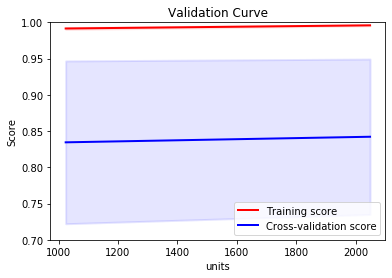

In [84]:
NN_grid_search_validation_curve(NN[2], 'units', log=False, ylim=(0.7, 1))

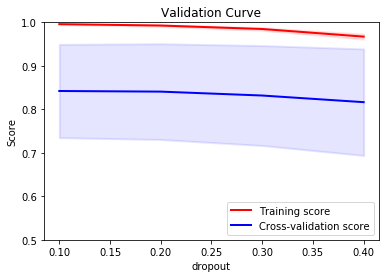

In [85]:
NN_grid_search_validation_curve(NN[2], 'dropout', log=False, ylim=(0.5, 1))

In [235]:
#due to incompatibility issues, learning curve for kerasclassifier could not be made.

#### XGBoost

In [86]:
import xgboost as xgb 

In [87]:
xgb_params_grid ={'max_depth': [2,4,8,16,24,30,36]}

model_xgb = xgb.XGBClassifier(n_estimators= 500)

xgboostclassifier = GridSearchCV(model_xgb, 
                    param_grid=xgb_params_grid, 
                    cv=10, 
                    return_train_score= True, 
                    scoring = 'f1')

xgb_pipe = Pipeline(steps = [ 
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('xgb_classifier', xgboostclassifier)
])

tuned_xgb = xgb_pipe.fit(X_train, Y_train)

In [88]:
dump(xgb_pipe, 'Project2_xgb.joblib')

['Project2_xgb.joblib']

In [26]:
xgb_pipe = load('Project2_xgb.joblib')

In [27]:
print('Grid search mean and stdev:\n')
scoring = xgb_pipe[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.868 (+/-0.300) for {'max_depth': 2}
0.874 (+/-0.292) for {'max_depth': 4}
0.874 (+/-0.277) for {'max_depth': 8}
0.881 (+/-0.254) for {'max_depth': 16}
0.885 (+/-0.241) for {'max_depth': 24}
0.886 (+/-0.240) for {'max_depth': 30}
0.885 (+/-0.240) for {'max_depth': 36}


In [28]:
# Print best params
print('\nBest parameters:', xgb_pipe[2].best_params_)


Best parameters: {'max_depth': 30}


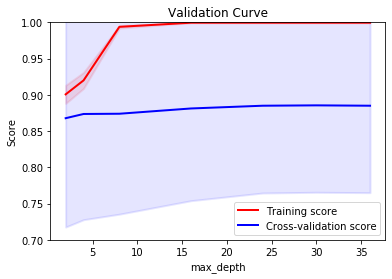

In [93]:
plot_grid_search_validation_curve(xgb_pipe[2], 'max_depth', log=False, ylim=(0.7, 1))

<module 'matplotlib.pyplot' from 'C:\\Users\\antho\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

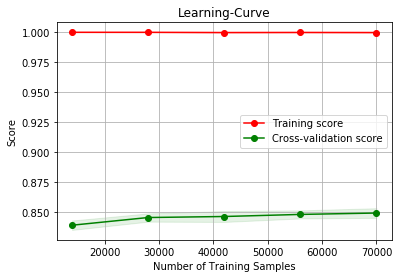

In [236]:
xbg_learning = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('classifer', xgb.XGBClassifier(n_estimators= 500, max_depth= 30))
    ]) #best parameters

plot_learning_curve(xbg_learning)

#### SVM

In [94]:
from sklearn.svm import LinearSVC, SVC

In [95]:
svc_params_grid = {'C': [0.01, 1, 100, 1000, 1e5], 
     'tol': [0.01, 1, 100, 1000, 1e5]}
  
model_svc = LinearSVC(verbose =1)

svc_grid = GridSearchCV(model_svc, 
                    param_grid=svc_params_grid, 
                    cv=10, 
                    return_train_score= True, 
                    scoring = 'f1')

svc_pipe = Pipeline(steps = [ 
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('svc_classifier', svc_grid)
])

tuned_svc = svc_pipe.fit(X_train, Y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

In [96]:
dump(svc_pipe, 'Project2_svc.joblib')

['Project2_svc.joblib']

In [23]:
svc_pipe = load('Project2_svc.joblib')

In [30]:
print('Grid search mean and stdev:\n')
scoring = svc_pipe[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.769 (+/-0.008) for {'C': 0.01, 'tol': 0.01}
0.769 (+/-0.008) for {'C': 0.01, 'tol': 1}
0.710 (+/-0.123) for {'C': 0.01, 'tol': 100}
0.670 (+/-0.206) for {'C': 0.01, 'tol': 1000}
0.606 (+/-0.331) for {'C': 0.01, 'tol': 100000.0}
0.749 (+/-0.063) for {'C': 1, 'tol': 0.01}
0.695 (+/-0.182) for {'C': 1, 'tol': 1}
0.605 (+/-0.271) for {'C': 1, 'tol': 100}
0.604 (+/-0.273) for {'C': 1, 'tol': 1000}
0.641 (+/-0.226) for {'C': 1, 'tol': 100000.0}
0.578 (+/-0.429) for {'C': 100, 'tol': 0.01}
0.647 (+/-0.324) for {'C': 100, 'tol': 1}
0.569 (+/-0.371) for {'C': 100, 'tol': 100}
0.611 (+/-0.234) for {'C': 100, 'tol': 1000}
0.632 (+/-0.275) for {'C': 100, 'tol': 100000.0}
0.663 (+/-0.321) for {'C': 1000, 'tol': 0.01}
0.710 (+/-0.106) for {'C': 1000, 'tol': 1}
0.613 (+/-0.357) for {'C': 1000, 'tol': 100}
0.595 (+/-0.346) for {'C': 1000, 'tol': 1000}
0.646 (+/-0.186) for {'C': 1000, 'tol': 100000.0}
0.599 (+/-0.309) for {'C': 100000.0, 'tol': 0.01}
0.682 (+/-0.137) for 

In [31]:
# Print best params
print('\nBest parameters:', svc_pipe[2].best_params_)


Best parameters: {'C': 0.01, 'tol': 0.01}


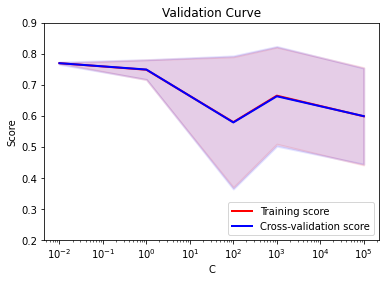

In [31]:
NN_grid_search_validation_curve(svc_pipe[2], 'C', log=True, ylim=(0.2, 0.9))

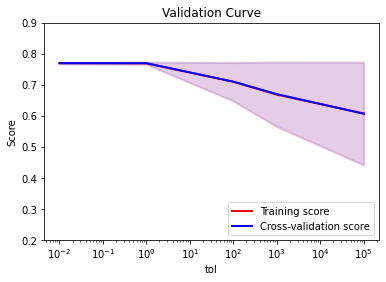

In [32]:
NN_grid_search_validation_curve(svc_pipe[2], 'tol', log=True, ylim=(0.2, 0.9))

<module 'matplotlib.pyplot' from 'C:\\Users\\antho\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

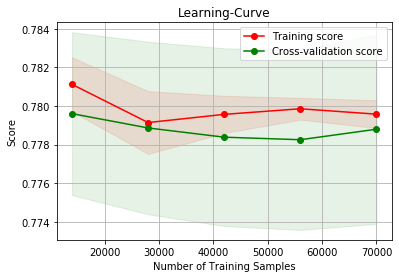

In [237]:
svc_learning = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('classifer', LinearSVC(verbose =1, C= 0.01, tol= 0.01))
    ]) #best parameters

plot_learning_curve(svc_learning)

#### LightGBM

In [101]:
import lightgbm as lgb

In [102]:
lgb_params_grid ={'max_depth': [2,4,8,16,24,30,36]}

model_lgb = lgb.LGBMClassifier(n_estimators = 200, num_leaves =  50)

lgbclassifier = GridSearchCV(model_lgb, 
                    param_grid=lgb_params_grid, 
                    cv=10, return_train_score= True, scoring = 'f1')

lgb_pipe = Pipeline(steps = [ 
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('lgb_classifier', lgbclassifier)
])

tuned_lgb = lgb_pipe.fit(X_train, Y_train)

In [103]:
dump(lgb_pipe, 'Project2_lgb.joblib')

['Project2_lgb.joblib']

In [32]:
lgb_pipe = load('Project2_lgb.joblib')

In [33]:
print('Grid search mean and stdev:\n')
scoring = lgb_pipe[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.844 (+/-0.150) for {'max_depth': 2}
0.868 (+/-0.246) for {'max_depth': 4}
0.875 (+/-0.273) for {'max_depth': 8}
0.875 (+/-0.276) for {'max_depth': 16}
0.875 (+/-0.278) for {'max_depth': 24}
0.875 (+/-0.275) for {'max_depth': 30}
0.875 (+/-0.276) for {'max_depth': 36}


In [34]:
# Print best params
print('\nBest parameters:', lgb_pipe[2].best_params_)


Best parameters: {'max_depth': 8}


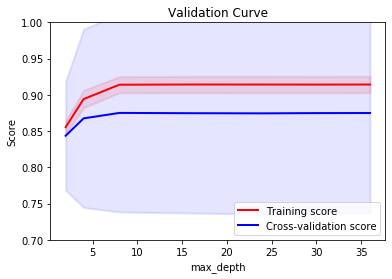

In [109]:
plot_grid_search_validation_curve(lgb_pipe[2], 'max_depth', log=False, ylim=(0.7, 1))

<module 'matplotlib.pyplot' from 'C:\\Users\\antho\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

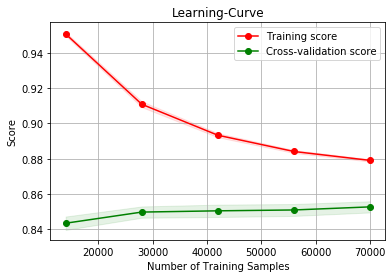

In [238]:
lgb_learning = Pipeline(steps = [    
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('classifer', lgb.LGBMClassifier(n_estimators = 200, 
                                     num_leaves =  50, 
                                     max_depth= 8))
    ]) #best parameters

plot_learning_curve(lgb_learning)

#### CatBoost

In [110]:
import catboost as cb

In [111]:
lgb_params_grid ={'max_depth': [2,4,8,16,24,30,36]}

model_cb = cb.CatBoostClassifier(iterations = 50)

cbclassifier = GridSearchCV(model_cb, 
                    param_grid=lgb_params_grid, 
                    cv=10, 
                    return_train_score= True, 
                    scoring = 'f1')

cb_pipe = Pipeline(steps = [ 
    ('preprocessing', preprocessor),
    ('sampling', SMOTE()),
    ('cb_classifier', cbclassifier)
])

tuned_cb = cb_pipe.fit(X_train, Y_train)

Learning rate set to 0.5
0:	learn: 0.5920225	total: 68.8ms	remaining: 3.37s
1:	learn: 0.5460676	total: 76.4ms	remaining: 1.83s
2:	learn: 0.5165125	total: 84.3ms	remaining: 1.32s
3:	learn: 0.4969324	total: 92ms	remaining: 1.06s
4:	learn: 0.4820029	total: 99.9ms	remaining: 899ms
5:	learn: 0.4710952	total: 108ms	remaining: 790ms
6:	learn: 0.4635737	total: 115ms	remaining: 707ms
7:	learn: 0.4533639	total: 123ms	remaining: 647ms
8:	learn: 0.4457826	total: 131ms	remaining: 596ms
9:	learn: 0.4417198	total: 139ms	remaining: 554ms
10:	learn: 0.4373568	total: 146ms	remaining: 518ms
11:	learn: 0.4330967	total: 155ms	remaining: 490ms
12:	learn: 0.4296711	total: 163ms	remaining: 463ms
13:	learn: 0.4231257	total: 171ms	remaining: 441ms
14:	learn: 0.4200159	total: 179ms	remaining: 418ms
15:	learn: 0.4175460	total: 187ms	remaining: 397ms
16:	learn: 0.4133036	total: 196ms	remaining: 380ms
17:	learn: 0.4084290	total: 205ms	remaining: 364ms
18:	learn: 0.4066539	total: 213ms	remaining: 347ms
19:	learn: 0.

19:	learn: 0.4271849	total: 173ms	remaining: 260ms
20:	learn: 0.4214335	total: 182ms	remaining: 251ms
21:	learn: 0.4147427	total: 191ms	remaining: 243ms
22:	learn: 0.4106285	total: 201ms	remaining: 236ms
23:	learn: 0.4046623	total: 212ms	remaining: 229ms
24:	learn: 0.4023283	total: 220ms	remaining: 220ms
25:	learn: 0.4002620	total: 229ms	remaining: 212ms
26:	learn: 0.3974282	total: 238ms	remaining: 202ms
27:	learn: 0.3959865	total: 246ms	remaining: 193ms
28:	learn: 0.3923807	total: 256ms	remaining: 185ms
29:	learn: 0.3876460	total: 264ms	remaining: 176ms
30:	learn: 0.3866061	total: 273ms	remaining: 167ms
31:	learn: 0.3827156	total: 281ms	remaining: 158ms
32:	learn: 0.3814981	total: 290ms	remaining: 149ms
33:	learn: 0.3803731	total: 299ms	remaining: 141ms
34:	learn: 0.3789473	total: 307ms	remaining: 132ms
35:	learn: 0.3781131	total: 315ms	remaining: 122ms
36:	learn: 0.3728522	total: 325ms	remaining: 114ms
37:	learn: 0.3715217	total: 333ms	remaining: 105ms
38:	learn: 0.3671146	total: 342

41:	learn: 0.3595485	total: 358ms	remaining: 68.3ms
42:	learn: 0.3587839	total: 367ms	remaining: 59.8ms
43:	learn: 0.3575388	total: 376ms	remaining: 51.2ms
44:	learn: 0.3554180	total: 385ms	remaining: 42.8ms
45:	learn: 0.3515907	total: 394ms	remaining: 34.3ms
46:	learn: 0.3506439	total: 403ms	remaining: 25.7ms
47:	learn: 0.3468911	total: 413ms	remaining: 17.2ms
48:	learn: 0.3453469	total: 421ms	remaining: 8.59ms
49:	learn: 0.3420583	total: 430ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5953963	total: 11.6ms	remaining: 569ms
1:	learn: 0.5498804	total: 21.1ms	remaining: 506ms
2:	learn: 0.5204717	total: 31.8ms	remaining: 498ms
3:	learn: 0.5006926	total: 41.1ms	remaining: 473ms
4:	learn: 0.4894407	total: 49.3ms	remaining: 444ms
5:	learn: 0.4796787	total: 57.6ms	remaining: 422ms
6:	learn: 0.4704702	total: 67.7ms	remaining: 416ms
7:	learn: 0.4646587	total: 75.7ms	remaining: 397ms
8:	learn: 0.4592276	total: 83.6ms	remaining: 381ms
9:	learn: 0.4550108	total: 91.7ms	remaining: 367ms


Learning rate set to 0.5
0:	learn: 0.5686378	total: 11.6ms	remaining: 570ms
1:	learn: 0.5137857	total: 23.9ms	remaining: 573ms
2:	learn: 0.4839357	total: 34.9ms	remaining: 546ms
3:	learn: 0.4636839	total: 45ms	remaining: 518ms
4:	learn: 0.4486547	total: 55.7ms	remaining: 501ms
5:	learn: 0.4391987	total: 66.2ms	remaining: 485ms
6:	learn: 0.4300622	total: 76.8ms	remaining: 472ms
7:	learn: 0.4192268	total: 87.4ms	remaining: 459ms
8:	learn: 0.4021023	total: 99ms	remaining: 451ms
9:	learn: 0.3939619	total: 109ms	remaining: 438ms
10:	learn: 0.3839506	total: 119ms	remaining: 422ms
11:	learn: 0.3795719	total: 130ms	remaining: 411ms
12:	learn: 0.3745590	total: 140ms	remaining: 398ms
13:	learn: 0.3644741	total: 151ms	remaining: 389ms
14:	learn: 0.3553445	total: 162ms	remaining: 379ms
15:	learn: 0.3489606	total: 172ms	remaining: 366ms
16:	learn: 0.3436483	total: 183ms	remaining: 356ms
17:	learn: 0.3408679	total: 193ms	remaining: 343ms
18:	learn: 0.3318758	total: 204ms	remaining: 333ms
19:	learn: 

16:	learn: 0.3798694	total: 178ms	remaining: 345ms
17:	learn: 0.3728017	total: 189ms	remaining: 337ms
18:	learn: 0.3705654	total: 200ms	remaining: 327ms
19:	learn: 0.3688976	total: 211ms	remaining: 317ms
20:	learn: 0.3629871	total: 223ms	remaining: 308ms
21:	learn: 0.3586918	total: 232ms	remaining: 296ms
22:	learn: 0.3567666	total: 242ms	remaining: 284ms
23:	learn: 0.3520708	total: 253ms	remaining: 274ms
24:	learn: 0.3458096	total: 265ms	remaining: 265ms
25:	learn: 0.3438347	total: 277ms	remaining: 256ms
26:	learn: 0.3424166	total: 290ms	remaining: 247ms
27:	learn: 0.3402418	total: 302ms	remaining: 237ms
28:	learn: 0.3373977	total: 312ms	remaining: 226ms
29:	learn: 0.3349037	total: 323ms	remaining: 215ms
30:	learn: 0.3314735	total: 333ms	remaining: 204ms
31:	learn: 0.3270078	total: 345ms	remaining: 194ms
32:	learn: 0.3251785	total: 357ms	remaining: 184ms
33:	learn: 0.3195114	total: 368ms	remaining: 173ms
34:	learn: 0.3171917	total: 379ms	remaining: 162ms
35:	learn: 0.3156724	total: 390

32:	learn: 0.3197532	total: 362ms	remaining: 186ms
33:	learn: 0.3177394	total: 373ms	remaining: 175ms
34:	learn: 0.3158615	total: 383ms	remaining: 164ms
35:	learn: 0.3134677	total: 395ms	remaining: 153ms
36:	learn: 0.3124354	total: 405ms	remaining: 142ms
37:	learn: 0.3112768	total: 417ms	remaining: 132ms
38:	learn: 0.3105595	total: 427ms	remaining: 120ms
39:	learn: 0.3087785	total: 438ms	remaining: 109ms
40:	learn: 0.3041102	total: 449ms	remaining: 98.6ms
41:	learn: 0.3026899	total: 460ms	remaining: 87.6ms
42:	learn: 0.3015361	total: 471ms	remaining: 76.6ms
43:	learn: 0.2985431	total: 482ms	remaining: 65.8ms
44:	learn: 0.2977621	total: 493ms	remaining: 54.8ms
45:	learn: 0.2968791	total: 504ms	remaining: 43.8ms
46:	learn: 0.2956822	total: 514ms	remaining: 32.8ms
47:	learn: 0.2944148	total: 524ms	remaining: 21.8ms
48:	learn: 0.2925211	total: 534ms	remaining: 10.9ms
49:	learn: 0.2909697	total: 545ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5741309	total: 12.5ms	remaining: 613ms

48:	learn: 0.2947403	total: 541ms	remaining: 11.1ms
49:	learn: 0.2918039	total: 557ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5431065	total: 24.9ms	remaining: 1.22s
1:	learn: 0.4787096	total: 44.6ms	remaining: 1.07s
2:	learn: 0.4424374	total: 63.7ms	remaining: 998ms
3:	learn: 0.4208394	total: 84ms	remaining: 966ms
4:	learn: 0.4036408	total: 104ms	remaining: 933ms
5:	learn: 0.3861128	total: 125ms	remaining: 913ms
6:	learn: 0.3746105	total: 144ms	remaining: 884ms
7:	learn: 0.3579532	total: 164ms	remaining: 862ms
8:	learn: 0.3459768	total: 184ms	remaining: 839ms
9:	learn: 0.3397532	total: 206ms	remaining: 824ms
10:	learn: 0.3318061	total: 227ms	remaining: 805ms
11:	learn: 0.3237862	total: 247ms	remaining: 784ms
12:	learn: 0.3193459	total: 268ms	remaining: 764ms
13:	learn: 0.3134220	total: 288ms	remaining: 739ms
14:	learn: 0.3064880	total: 307ms	remaining: 715ms
15:	learn: 0.2962904	total: 329ms	remaining: 699ms
16:	learn: 0.2892847	total: 350ms	remaining: 680ms
17:	learn: 0.28

9:	learn: 0.3669600	total: 213ms	remaining: 854ms
10:	learn: 0.3563613	total: 235ms	remaining: 832ms
11:	learn: 0.3520761	total: 253ms	remaining: 803ms
12:	learn: 0.3467860	total: 274ms	remaining: 780ms
13:	learn: 0.3415888	total: 293ms	remaining: 753ms
14:	learn: 0.3385147	total: 313ms	remaining: 729ms
15:	learn: 0.3347647	total: 334ms	remaining: 710ms
16:	learn: 0.3319190	total: 356ms	remaining: 690ms
17:	learn: 0.3262748	total: 379ms	remaining: 673ms
18:	learn: 0.3213620	total: 399ms	remaining: 651ms
19:	learn: 0.3190755	total: 419ms	remaining: 628ms
20:	learn: 0.3163539	total: 439ms	remaining: 606ms
21:	learn: 0.3135550	total: 458ms	remaining: 583ms
22:	learn: 0.3108230	total: 475ms	remaining: 558ms
23:	learn: 0.3083482	total: 495ms	remaining: 536ms
24:	learn: 0.3036217	total: 516ms	remaining: 516ms
25:	learn: 0.2984139	total: 536ms	remaining: 495ms
26:	learn: 0.2959851	total: 556ms	remaining: 474ms
27:	learn: 0.2942840	total: 575ms	remaining: 452ms
28:	learn: 0.2924481	total: 595m

27:	learn: 0.2896383	total: 568ms	remaining: 446ms
28:	learn: 0.2865861	total: 588ms	remaining: 426ms
29:	learn: 0.2844000	total: 608ms	remaining: 406ms
30:	learn: 0.2824622	total: 629ms	remaining: 385ms
31:	learn: 0.2808929	total: 648ms	remaining: 365ms
32:	learn: 0.2789331	total: 668ms	remaining: 344ms
33:	learn: 0.2772399	total: 688ms	remaining: 324ms
34:	learn: 0.2737490	total: 709ms	remaining: 304ms
35:	learn: 0.2719479	total: 729ms	remaining: 284ms
36:	learn: 0.2705944	total: 750ms	remaining: 263ms
37:	learn: 0.2693387	total: 773ms	remaining: 244ms
38:	learn: 0.2683172	total: 793ms	remaining: 224ms
39:	learn: 0.2671585	total: 818ms	remaining: 205ms
40:	learn: 0.2660148	total: 840ms	remaining: 184ms
41:	learn: 0.2650577	total: 861ms	remaining: 164ms
42:	learn: 0.2638135	total: 884ms	remaining: 144ms
43:	learn: 0.2623403	total: 906ms	remaining: 124ms
44:	learn: 0.2612416	total: 932ms	remaining: 104ms
45:	learn: 0.2598280	total: 954ms	remaining: 83ms
46:	learn: 0.2589745	total: 975m

45:	learn: 0.2629797	total: 965ms	remaining: 83.9ms
46:	learn: 0.2617711	total: 990ms	remaining: 63.2ms
47:	learn: 0.2606819	total: 1.01s	remaining: 42.2ms
48:	learn: 0.2596970	total: 1.03s	remaining: 21.1ms
49:	learn: 0.2588637	total: 1.05s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5245804	total: 2.46s	remaining: 2m
1:	learn: 0.4502817	total: 4.69s	remaining: 1m 52s
2:	learn: 0.3972402	total: 6.87s	remaining: 1m 47s
3:	learn: 0.3712333	total: 9.07s	remaining: 1m 44s
4:	learn: 0.3460920	total: 11.3s	remaining: 1m 41s
5:	learn: 0.3326633	total: 13.5s	remaining: 1m 39s
6:	learn: 0.3134881	total: 15.7s	remaining: 1m 36s
7:	learn: 0.3029177	total: 18s	remaining: 1m 34s
8:	learn: 0.2942610	total: 20.2s	remaining: 1m 32s
9:	learn: 0.2838401	total: 22.4s	remaining: 1m 29s
10:	learn: 0.2762715	total: 24.6s	remaining: 1m 27s
11:	learn: 0.2703672	total: 26.9s	remaining: 1m 25s
12:	learn: 0.2659187	total: 29s	remaining: 1m 22s
13:	learn: 0.2600313	total: 31.2s	remaining: 1m 20s
14:	lear

3:	learn: 0.3946264	total: 9.46s	remaining: 1m 48s
4:	learn: 0.3764824	total: 11.8s	remaining: 1m 46s
5:	learn: 0.3591590	total: 14.1s	remaining: 1m 43s
6:	learn: 0.3453642	total: 16.4s	remaining: 1m 40s
7:	learn: 0.3361968	total: 18.7s	remaining: 1m 38s
8:	learn: 0.3280228	total: 21s	remaining: 1m 35s
9:	learn: 0.3197490	total: 23.4s	remaining: 1m 33s
10:	learn: 0.3127961	total: 25.7s	remaining: 1m 31s
11:	learn: 0.3060203	total: 28s	remaining: 1m 28s
12:	learn: 0.3012062	total: 30.3s	remaining: 1m 26s
13:	learn: 0.2973686	total: 32.7s	remaining: 1m 24s
14:	learn: 0.2923351	total: 35.1s	remaining: 1m 21s
15:	learn: 0.2879263	total: 37.4s	remaining: 1m 19s
16:	learn: 0.2848040	total: 39.8s	remaining: 1m 17s
17:	learn: 0.2804127	total: 42.1s	remaining: 1m 14s
18:	learn: 0.2752596	total: 44.5s	remaining: 1m 12s
19:	learn: 0.2717837	total: 46.9s	remaining: 1m 10s
20:	learn: 0.2681667	total: 49.2s	remaining: 1m 7s
21:	learn: 0.2650742	total: 51.6s	remaining: 1m 5s
22:	learn: 0.2612987	tota

11:	learn: 0.3093905	total: 29.2s	remaining: 1m 32s
12:	learn: 0.3043769	total: 31.6s	remaining: 1m 30s
13:	learn: 0.2987449	total: 34.1s	remaining: 1m 27s
14:	learn: 0.2941198	total: 36.6s	remaining: 1m 25s
15:	learn: 0.2897262	total: 39s	remaining: 1m 22s
16:	learn: 0.2834687	total: 41.5s	remaining: 1m 20s
17:	learn: 0.2783163	total: 44s	remaining: 1m 18s
18:	learn: 0.2738982	total: 46.4s	remaining: 1m 15s
19:	learn: 0.2703929	total: 48.8s	remaining: 1m 13s
20:	learn: 0.2669775	total: 51.2s	remaining: 1m 10s
21:	learn: 0.2635334	total: 53.6s	remaining: 1m 8s
22:	learn: 0.2597595	total: 56.1s	remaining: 1m 5s
23:	learn: 0.2568723	total: 58.5s	remaining: 1m 3s
24:	learn: 0.2549605	total: 1m	remaining: 1m
25:	learn: 0.2519225	total: 1m 3s	remaining: 58.4s
26:	learn: 0.2494276	total: 1m 5s	remaining: 55.9s
27:	learn: 0.2474451	total: 1m 8s	remaining: 53.4s
28:	learn: 0.2451302	total: 1m 10s	remaining: 50.9s
29:	learn: 0.2426332	total: 1m 12s	remaining: 48.4s
30:	learn: 0.2393414	total: 1

20:	learn: 0.2640607	total: 50.2s	remaining: 1m 9s
21:	learn: 0.2605485	total: 52.6s	remaining: 1m 6s
22:	learn: 0.2564551	total: 54.9s	remaining: 1m 4s
23:	learn: 0.2537790	total: 57.3s	remaining: 1m 2s
24:	learn: 0.2509283	total: 59.7s	remaining: 59.7s
25:	learn: 0.2485058	total: 1m 2s	remaining: 57.3s
26:	learn: 0.2463479	total: 1m 4s	remaining: 54.9s
27:	learn: 0.2434987	total: 1m 6s	remaining: 52.4s
28:	learn: 0.2412326	total: 1m 9s	remaining: 50.1s
29:	learn: 0.2382219	total: 1m 11s	remaining: 47.7s
30:	learn: 0.2358139	total: 1m 13s	remaining: 45.3s
31:	learn: 0.2326114	total: 1m 16s	remaining: 42.8s
32:	learn: 0.2302164	total: 1m 18s	remaining: 40.4s
33:	learn: 0.2279600	total: 1m 20s	remaining: 38s
34:	learn: 0.2261499	total: 1m 23s	remaining: 35.6s
35:	learn: 0.2223800	total: 1m 25s	remaining: 33.2s
36:	learn: 0.2202376	total: 1m 27s	remaining: 30.8s
37:	learn: 0.2176962	total: 1m 30s	remaining: 28.4s
38:	learn: 0.2151797	total: 1m 32s	remaining: 26.1s
39:	learn: 0.2132130	to

In [112]:
dump(cb_pipe, 'Project2_cb.joblib')

['Project2_cb.joblib']

In [35]:
cb_pipe = load('Project2_cb.joblib')

In [36]:
print('Grid search mean and stdev:\n')
scoring = cb_pipe[2].cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))

Grid search mean and stdev:

0.843 (+/-0.159) for {'max_depth': 2}
0.858 (+/-0.237) for {'max_depth': 4}
0.867 (+/-0.264) for {'max_depth': 8}
0.874 (+/-0.238) for {'max_depth': 16}
nan (+/-nan) for {'max_depth': 24}
nan (+/-nan) for {'max_depth': 30}
nan (+/-nan) for {'max_depth': 36}


In [37]:
# Print best params
print('\nBest parameters:', cb_pipe[2].best_params_)


Best parameters: {'max_depth': 16}


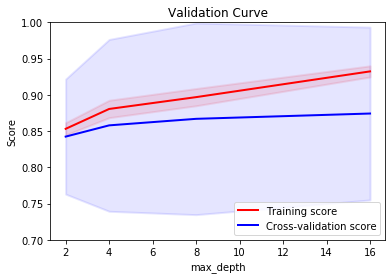

In [118]:
plot_grid_search_validation_curve(cb_pipe[2], 'max_depth', log=False, ylim=(0.7, 1))

In [41]:
from sklearn.metrics import classification_report

#### Voting Ensemble 

In [38]:
from mlxtend.classifier import EnsembleVoteClassifier, StackingClassifier

In [46]:
vote_model = EnsembleVoteClassifier(clfs=[LogReg, 
                                          Dtree, 
                                          Rforest, 
                                          NN, 
                                          xgb_pipe,
                                          svc_pipe,
                                          lgb_pipe,
                                          cb_pipe], 
                              voting='hard', 
                                        weights = [1,
                                                   1,
                                                   1.2,
                                                   1.2,
                                                   1.5,
                                                   1.2,
                                                   1.6,
                                                   1.6],
                                        fit_base_estimators=False)

labels = ['Logistic Regression', 
          'Decision Tree', 
          'Random Forest', 
          'Neural Network', 
          'XGB Classifier',
          'LightGB Classifier',
          'CatBoost Classifier',
          'Ensemble']

vote_model.fit(X_test, Y_test)

print(classification_report(Y_test, vote_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91     27572
         1.0       0.69      0.60      0.64      7977

    accuracy                           0.85     35549
   macro avg       0.79      0.76      0.77     35549
weighted avg       0.84      0.85      0.85     35549



In [48]:
from mlxtend.classifier import StackingClassifier
import copy


stacker_model = StackingClassifier(classifiers= [LogReg, 
                                        Dtree, 
                                        Rforest, 
                                        NN, 
                                        xgb_pipe,
                                        svc_pipe,
                                        lgb_pipe,
                                        cb_pipe], 
                          meta_classifier= LogisticRegression(
                              solver = 'liblinear', 
                              C=0.00001,
                              tol = 0.0001,
                              max_iter = 20000, 
                              verbose =1), 
                            fit_base_estimators=False)

labels = ['Logistic Regression', 
          'Decision Tree', 
          'Random Forest', 
          'Neural Network', 
          'XGB Classifier',
          'LightGB Classifier',
          'CatBoost Classifier',
          'Stacking']

stacker_model.fit(X_train, Y_train)

print(classification_report(Y_test, stacker_model.predict(X_test)))

[LibLinear]              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     27572
         1.0       0.70      0.58      0.64      7977

    accuracy                           0.85     35549
   macro avg       0.79      0.76      0.77     35549
weighted avg       0.84      0.85      0.85     35549



## Model Comparisons

In [49]:
# to safely compare the models without using overfitted data 
# from the hold-out test data, we will split 50/50 to create a cross-validation set
# we create 10 fold cross-validation from the those data to test out the F1 score for comparison
# then we would do a pairwise t test on the every pair of models to confirm whether the models are 
# significantly different from each other. 

from sklearn.metrics import f1_score
X_val, X_final, Y_val, Y_final = train_test_split(X_test, Y_test, random_state = 23, test_size = 0.5)

folds = 10
Y_val_folds = np.array_split(Y_val, folds)

LogReg_folds = np.array_split(LogReg.predict(X_val), folds)
Dtree_folds = np.array_split(Dtree.predict(X_val), folds)
Rforest_folds = np.array_split(Rforest.predict(X_val), folds)
NN_folds = np.array_split(NN.predict(X_val), folds)
xgb_pipe_folds = np.array_split(xgb_pipe.predict(X_val), folds)
svc_pipe_folds = np.array_split(svc_pipe.predict(X_val), folds)
lgb_pipe_folds = np.array_split(lgb_pipe.predict(X_val), folds)
cb_pipe_folds = np.array_split(cb_pipe.predict(X_val), folds)
vote_model_folds = np.array_split(vote_model.predict(X_val), folds)
stacker_model_folds = np.array_split(stacker_model.predict(X_val), folds)

In [185]:
PRF_KWARGS = {
    'pos_label': 1,     # 1 is the positive rain tomorrow label
    'average': 'binary' # evaluate p/r/f of the positive label
}

def score_folds (Y_pred, Y_model, **kwargs):
        for Y_p, Y_m in zip (Y_pred, Y_model):
            yield f1_score(Y_p, Y_m, **kwargs)

In [186]:
LogReg_f1 = list(score_folds(Y_val_folds, LogReg_folds,  **PRF_KWARGS))
Dtree_f1 = list(score_folds(Y_val_folds, Dtree_folds,  **PRF_KWARGS))
Rforest_f1 = list(score_folds(Y_val_folds, Rforest_folds,  **PRF_KWARGS))
NN_f1 = list(score_folds(Y_val_folds, NN_folds,  **PRF_KWARGS))
xgb_pipe_f1 = list(score_folds(Y_val_folds, xgb_pipe_folds,  **PRF_KWARGS))
svc_pipe_f1 = list(score_folds(Y_val_folds, svc_pipe_folds,  **PRF_KWARGS))
lgb_pipe_f1 = list(score_folds(Y_val_folds, lgb_pipe_folds,  **PRF_KWARGS))
cb_pipe_f1 = list(score_folds(Y_val_folds, cb_pipe_folds,  **PRF_KWARGS))
vote_model_f1 = list(score_folds(Y_val_folds, vote_model_folds,  **PRF_KWARGS))
stacker_model_f1 = list(score_folds(Y_val_folds, stacker_model_folds,  **PRF_KWARGS))

In [187]:
from scipy import stats

In [188]:
f1_scores = [LogReg_f1, 
            Dtree_f1,
            Rforest_f1,
            NN_f1,
            xgb_pipe_f1,
            svc_pipe_f1,
            lgb_pipe_f1,
            cb_pipe_f1, 
            vote_model_f1, 
            stacker_model_f1]

f1_names = ["LogReg_f1", 
            "Dtree_f1",
            "Rforest_f1",
            "NN_f1",
            "xgb_pipe_f1",
            "svc_pipe_f1",
            "lgb_pipe_f1",
            "cb_pipe_f1", 
            "vote_model_f1", 
            "stacker_model_f1"] 

In [189]:
def avg_f1(f1_score):
    return np.average(f1_score)

avg_f1_scores = []
for f1_score in f1_scores:
    avg_f1_scores.append(avg_f1(f1_score))
    
avg_f1_table = pd.DataFrame(f1_names)
avg_f1_score = pd.DataFrame(avg_f1_scores) 

table = pd.concat([avg_f1_table, avg_f1_score], axis =1)
table.columns = ['model','avg_f1_score']
table.sort_values('avg_f1_score', ascending = False)

,model,avg_f1_score
8,vote_model_f1,0.638046
9,stacker_model_f1,0.636257
2,Rforest_f1,0.626386
7,cb_pipe_f1,0.622421
6,lgb_pipe_f1,0.619889
4,xgb_pipe_f1,0.618074
0,LogReg_f1,0.604198
5,svc_pipe_f1,0.603742
3,NN_f1,0.584414
1,Dtree_f1,0.526849


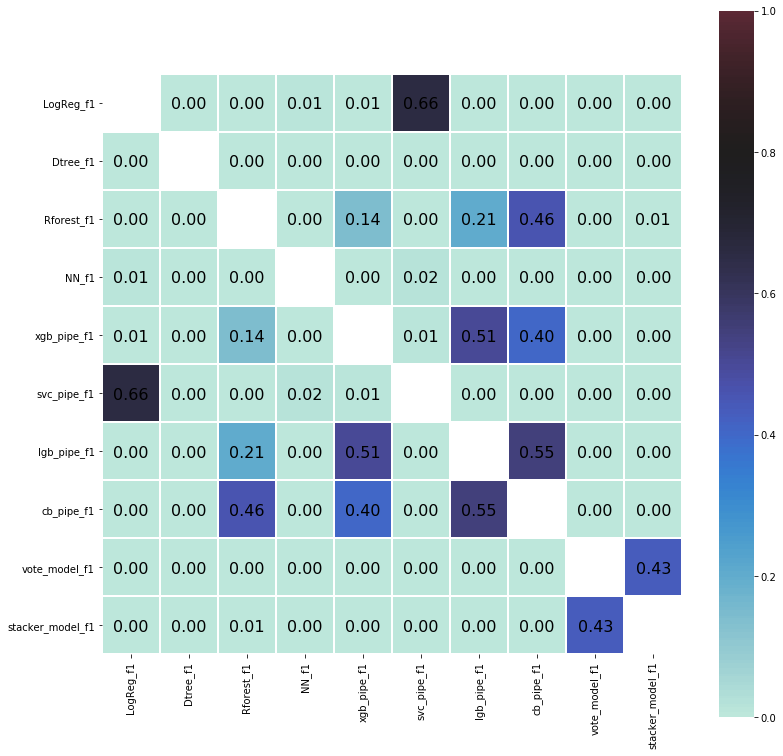

In [191]:
pairwiset_p_values = pd.DataFrame(np.zeros((10,10)))

for i in range(len(f1_scores)):
    for j in range(len(f1_scores)):
        pairwiset_p_values[i][j] = stats.ttest_rel(f1_scores[i], f1_scores[j])[1]
        
pairwiset_p_values.columns = f1_names
pairwiset_p_values.index = f1_names

plt.figure(figsize = (13,13))
p_values = sns.heatmap(pairwiset_p_values, annot = True, center=0.8, square=True, 
                 annot_kws={"size": 16, "va": "center_baseline", "color": "black"}, fmt=".2f", 
                 linewidth=1, linecolor='white', vmin=0, vmax=1, cbar=True)

As shown above, most models are significantly different from each other as there are sufficient evidence (p < 0.05) that the results are different for each model. Interesting observations are that SVC and logistic regression has very little evidence that they are significantly different. 

Then, within the family of tree-based models, we can see that there is not enough 

#### Model Performance - Final Test

In [194]:
print(classification_report(Y_final, vote_model.predict(X_final)))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91     13791
         1.0       0.70      0.61      0.65      3984

    accuracy                           0.85     17775
   macro avg       0.79      0.77      0.78     17775
weighted avg       0.85      0.85      0.85     17775



In [51]:
print(classification_report(Y_final, stacker_model.predict(X_final)))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     13791
         1.0       0.71      0.59      0.64      3984

    accuracy                           0.85     17775
   macro avg       0.80      0.76      0.78     17775
weighted avg       0.85      0.85      0.85     17775

